# Wykorzystywanie Big Data w Podejmowaniu Decyzji Biznesowych - Analiza Danych E-Commerce O-List Brazil
### Projekt Przejściowy 2
### Konrad Lubiński

<hr style="border:2px solid gray">

## Wpływ Danych na Podejmowanie Decyzji Biznesowych

Postępujący w XX i XXI wieku rozwój technologii informacyjnych doprowadził do znaczących przemian w sposobie w jakim patrzymy na *dane*. Był on bowiem głównym czynnikiem wykształcenia się pojęcia **Big Data**, oznaczającego duże zbiory danych generowane zarówno przez prywatne przedsiębiorstwa, administrację publiczną czy zwyczajnych użytkowników korzystających z urządzeń podłączonych do sieci (zgodnie z koncepcją *IoT*). 

Owe zbiory scharakteryzować można za pomocą definicji *"trzech V"*, zapropowanej przez Douga Laneya: 
* volume (objętość) - odnosząca się do dużych ilości danych, które są pobierane, przetwarzane oraz magazynowane
* velocity (prędkość napływu) - odnosząca się do strumieniowego i ciągłego przepływu danych
* variety (różnorodność) - odnosząca się zarówno do rozmaitości tematycznej i zawartości zbiorów danych, jak i wielości ich źródeł 

Wymienione powyżej aspekty Big Data sprawiają, że staje się ono atrakcyjne dla **edukacji** (na przykład jako źródło researchu badań socjologicznych dotyczących społeczeństw w erze cyfrowej), **medycyny** (na przykład poprzez umożliwienie budowanie systemów online, takich jak BASiW oferujących Mapy Potrzeb Zdrowotnych), **wojska** (na przykład poprzez monitorowanie potencjalnych zagrożeń), **administracji publicznej** (na przykład poprzez umożliwienie poprawy jakości dostarczanych usług) czy **prywatnych przedsiębiorstw**. 

Duże zbiory danych znajdują w biznesie cały szereg potencjalnych zastosowań, między innymi w następujących sektorach:
* bankowość (na przykład: rozwój bankowości elektronicznej)
* marketing (na przykład: analiza trendów na social mediach)
* transport (na przykład: tracking zamówień)

Kluczowym zastosowaniem Big Data, występującym w większości współczesnych przedsiębiorstw, jest możliwość wykorzystywania danych w *procesie podejmowania decyzji biznesowych*. Wspomniany rozwój technologiczny oraz popularyzacja danych doprowadził bowiem do powstania i popularyzacji koncepcji **Business Intelligence** - procesu zbierania, eksploracji, analizy i interpretacji danych, mającego na celu usprawnienie oraz zracjonalizowanie procesu podejmowania decyzji przez kadrę menedżerską.

Celem poniższej pracy jest zaprezentowanie możliwości jakie niesie za sobą wykorzystywanie dużych zbiorów danych w procesach Business Intelligence, na przykładzie danych o zamówieniach firmy **O-List Brazil**. 

## Case Study O-List Brazil

**Olist Serviços Digitais Ltda** to brazylijskie przedsiębiorstwo oferujące usługi logistyczne za pośrednictwem platformy online, łączącej ze sobą użytkowników wystawiających swoje produkty na sprzedaż z ich potencjalnymi klientami. Platforma przypomina w swym działaniu popularne w Polsce *Allegro* czy *Vinted*. Aplikację O-List Brazil znaleźć można pod poniższym linkiem: 

https://play.google.com/store/apps/details?id=com.olist.appseller&hl=pl&gl=US&pli=1

Z racji, że popularność **platform internetowych** w ostatnich zdaje się rosnąć (zarówno w handlu internetowym - na przykład Amazon - jak i branży rozrywkowej - na przykład YouTube), model biznesowy O-List okazuje się być reprezentatywnym przedmiotem analizy, prowadzonej w poszukiwaniu odpowiedzi na pytanie *jakie wnioski mogą wyciągać menadżerowie ze zbiorów Big Data?*.

<hr style="border:2px solid gray">

## Pakiety

In [78]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

Pierwszym etapem pracy nad kodem w języku programowania **Python**, jest pobranie odpowiednich pakietów oraz modułów umożliwiających transformację (*pandas* i *numpy*), pobieranie materiałów z sieci (*BeautifulSoup* i *requests*), analizę i generowanie statystyk opisowych (*pandas, *statistics* czy *scipy.stats*) oraz wizualizację danych (*matplotlib* i *seaborn*), a także pracy z tekstem (*nltk*) oraz tworzenie słów wyrazów (*wordcloud*). 

## Inputy - pliki csv z danymi O-List

In [79]:
# wczytaj plik csv olist_order_items_dataset
order_items = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_order_items_dataset.csv", sep=",")

# wczytaj plik csv olist_order_payments_dataset
payments = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_order_payments_dataset.csv", sep=",")

# wczytaj plik csv olist_order_reviews_dataset
reviews = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_order_reviews_dataset.csv", sep=",")

# wczytaj plik csv olist_orders_dataset
orders = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_orders_dataset.csv", sep=",")

# wczytaj plik csv olist_products_dataset
products = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_products_dataset.csv", sep=",")

# wczytaj plik csv olist_sellers_dataset
sellers = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_sellers_dataset.csv", sep=",")

# wczytaj plik csv product_category_name_translation
product_category = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\product_category_name_translation.csv", sep=",")

# wczytaj plik csv olist_customers_dataset
customers = pd.read_csv(r"C:\Users\lubin\OneDrive\Pulpit\olist_brazil\olist_customers_dataset.csv", sep=",")

Podstawą projektu są dane pobrane z platformy **Kaggle**, umożliwiającej udostępnianie oraz pobieranie zbiorów danych typu OpenSource: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Pobrane pliki przechowywane są zarówno na lokalnym dekstopie autora projektu (skąd zostały zaczytane przez kod) oraz w repozytorium utworzonym na GitHub, skąd mogą zostać pobrane przez użytkownika z nadanym dostępem. 

Poszczególne pliki typu *comma separated values* (*.csv*), zawierają informacje na temat zamówień składanych za pośrednictwem strony O-List Brazil na przestrzeni lat 2016-2018. Dotyczą one:
1. *order_items*: produktów
2. *payments*: płatności
3. *reviews*: recenzji/ocen zamówień
4. *orders*: zamówień
5. *products*: produktów
6. *sellers*: sprzedawców
7. *product_category*: kategorii produktów
8. *customers*: klientów



Pliki zostały pobrane za pomocą funkcji z pakietu pandas: *pd.read_csv*, dzięki czemu możliwe jest ich wyświetlanie w formie **ramki danych** (**DataFrame**). 

## Inputy - dane pobrane z Wikipedii

Uzupełnieniem danych O-List udostępnionych na Kaggle, jest tabela danych pobrana za pomocą prostego web-scrappera bezpośrednio z artykułu **Wikipedii**. Informacje te dotyczą poszczególnych stanów Brazylii. Pobrana ramka danych zawiera więc:
* nazwę stanu
* kod stanu
* obszar stanu (w kilometrach kwadratowych)
* populację stanu
* gęstość zaludnienia
* wartość wskaźnika GDP (Gross Domestic Product)
* wartość wskaźnika HDI (Human Development Index)

In [80]:
# utwórz funkcję do pobierania tabeli z Wikipedii
def scrape_wikipedia_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})
    df = pd.read_html(str(table))[0]
    return df

# wykorzystaj funkcję do wczytania tabeli ze strony o laureatach nagrody Nobla
brazil_states = scrape_wikipedia_table('https://en.wikipedia.org/wiki/Federative_units_of_Brazil')

# zostaw tylko wybrane kolumny
brazil_states = brazil_states.loc[:, ['Flag and name', "Code", "Area (km2)[20]", "Population (May 2023)[21]", 
                                      "Density (per km2, 2022)", "GDP (R$ millions, 2022)[22]", "HDI (2022)[23]"]]

# zmień nazwy kolumn
brazil_states = brazil_states.rename(columns={"Flag and name": "state",
                                             "Area (km2)[20]": "area", 
                                             "Population (May 2023)[21]": "population",
                                             "Density (per km2, 2022)": "density",
                                             "GDP (R$ millions, 2022)[22]": "GDP", 
                                             "HDI (2022)[23]": "HDI"})

# pokaż tabelę z danymi na temat Brazylii
brazil_states

,state,Code,area,population,density,GDP,HDI
0,Acre,AC,164123,942123,6.34,21000,0.719
1,Alagoas,AL,27779,3407562,125.52,73000,0.683
2,Amapá,AP,142829,904535,2.63,9000,0.740
3,Amazonas,AM,1559159,4235555,2.58,103000,0.733
4,Bahia,BA,564733,15128926,30.52,257000,0.714
5,Ceará,CE,148921,8952013,60.33,157000,0.735
6,Distrito Federal,DF,5780,3204720,493.00,249000,0.850
7,Espírito Santo,ES,46096,4058378,80.63,125000,0.772
8,Goiás,GO,340112,7202463,18.46,202000,0.769
9,Maranhão,MA,331937,7206271,19.03,102000,0.687


## Przygotowywanie zbioru danych

Kolejnym etapem projektu, po pobraniu wymaganych pakietów oraz zbiorów danych, jest utworzenie ostatecznego zbioru danych, uzyskanego za pomocą połączenia poszczególnych plików z wykorzystaniem funkcji pd.merge oraz kluczy głównych:

In [81]:
# połącz dane z tabeli orders z danymi z tabeli payments na podstawie klucza 'order_id'
orders = orders.merge(payments, on='order_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli customers na podstawie klucza 'customer_id'
orders = orders.merge(customers, on='customer_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli order_items na podstawie klucza 'order_id'
orders = orders.merge(order_items, on='order_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli products na podstawie klucza 'product_id'
orders = orders.merge(products, on='product_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli product_category na podstawie klucza 'product_category_name'
orders = orders.merge(product_category, on='product_category_name', how='left')

# połącz dane z tabeli orders z danymi z tabeli reviews na podstawie klucza 'order_id'
orders = orders.merge(reviews, on='order_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli sellers na podstawie klucza 'seller_id'
orders = orders.merge(sellers, on='seller_id', how='left')

# połącz dane z tabeli orders z danymi z tabeli brazil_states na podatawie kluczy 'customer_state' oraz 'Code'
orders = orders.merge(brazil_states, left_on='customer_state', right_on='Code', how='left')

In [82]:
# utwórz dictionary do zmapowania kodów i nazw stanów
state_name_to_map = dict(zip(orders['customer_state'], orders['state']))

# dodaj pełne nazwy stanów pochodzenia sprzedawców
orders['sellers_state_names'] = orders['seller_state'].map(state_name_to_map)

Po uzyskaniu pełnej ramki danych, zmienione zostają nazwy kolumn w celu poprawy użyteczności tabeli. Dodatkowo, usunięte zostają pola, które nie będą wykorzystywane w reszcie projektu:

In [83]:
# zostaw tylko wybrane kolumny
orders = orders.loc[:, ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_type',
'payment_installments', 'payment_value', 'customer_city', 'customer_state', 'product_id', 'seller_id', 'sellers_state_names',
'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_category_name_english', 'review_id', 
'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 
'state', 'area', 'population', 'density', 'GDP', 'HDI']]

# zmień nazwy kolumn
orders = orders.rename(columns={'order_id' : 'order_id',
'customer_id' : 'customer_id',
'order_status' : 'order_status',
'order_purchase_timestamp' : 'order_purchase_date',
'order_approved_at' : 'order_approval_date',
'order_delivered_carrier_date' : 'order_delivered_carrier_date',
'order_delivered_customer_date' : 'order_delivered_customer_date',
'order_estimated_delivery_date' : 'order_estimated_delivery_date',
'payment_type' : 'payment_type',
'payment_installments' : 'payment_installments',
'payment_value' : 'payment_value',
'customer_city' : 'customer_city',
'customer_state' : 'customer_state_code',
'product_id' : 'product_id',
'seller_id' : 'seller_id',
"sellers_state_names": "seller_state",
'shipping_limit_date' : 'shipping_limit_to_logistic_partner_date',
'price' : 'item_price',
'freight_value' : 'shipping_cost',
'product_category_name' : 'product_category_name',
'product_category_name_english' : 'EN_product_category_name',
'review_id' : 'review_id',
'review_score' : 'review_score',
'review_comment_title' : 'review_title',
'review_comment_message' : 'review_text',
'review_creation_date' : 'review_date',
'review_answer_timestamp' : 'review_answer_date', 
'state': "customer_state", 
'area': "customer_state_area", 
'population': "customer_state_population", 
'density': "customer_state_density", 
'GDP': "customer_state_GDP", 
'HDI': "customer_state_HDI"})

# zostaw tylko wybrane kolumny
orders = orders.loc[:, ['order_id', 'order_status', 'order_purchase_date', 'order_approval_date',
'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
'shipping_limit_to_logistic_partner_date', 'payment_type', 'payment_installments', 'payment_value', 'customer_id',
'customer_city', 'customer_state_code',"customer_state", "customer_state_area", "customer_state_population",  
"customer_state_density",  "customer_state_GDP",  "customer_state_HDI", 'product_id', 'product_category_name', 
'EN_product_category_name', 'item_price', 'shipping_cost', 'seller_id', 'seller_state', 'review_id', 'review_score', 'review_title', 
'review_text', 'review_date', 'review_answer_date']]

## Typy i Braki Danych

Aby móc poprawnie wykorzystywać poszczególne pola, konieczne jest poprawienie **typów danych** oraz oznaczenie **braków danych**. Tabela zawiera kolumny z:
* wartościami tekstowymi (*string*)
* liczbami całkowitymi (*integer*)
* liczami dziesiętnymi (*float*) 
* datami (*datetime*)

In [84]:
# utwórz listę kolumn o typie danych 'string'
string_columns = ['order_id', 'order_status', 'payment_type', 'customer_id', 'customer_city', 'customer_state_code', 'customer_state', 'product_id', 'product_category_name', 'EN_product_category_name', 'seller_id', 'seller_state', 'review_id', 'review_title', 'review_text']

# uzupełnij braki danych wyrazem 'blank'
orders[string_columns] = orders[string_columns].fillna('blank')

# zmień typ danych wybranych kolumn
orders[string_columns] = orders[string_columns].astype(str)

# utwórz listę kolumn o typie danych 'datetime'
datetime_columns = ['order_purchase_date', 'order_approval_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_to_logistic_partner_date', 'review_date', 'review_answer_date']

# uzupełnij braki danych datą z roku '1900'
orders[datetime_columns] = orders[datetime_columns].fillna('1900-01-01 00:00:00')

# zmień typ danych wybranych kolumn
orders[datetime_columns] = orders[datetime_columns].apply(pd.to_datetime)

# utwórz listę kolumn o typie danych 'integer'
integers_columns = ['payment_installments', 'customer_state_area', 'customer_state_population', 'customer_state_GDP', 'review_score']

# uzupełnij braki danych liczbą '-10'
orders[integers_columns] = orders[integers_columns].fillna('-10')

# zmień typ danych wybranych kolumn
orders[integers_columns] = orders[integers_columns].astype(int)

# utwórz listę kolumn o typie danych 'float'
float_columns = ['payment_value', 'customer_state_density', 'customer_state_HDI', 'item_price', 'shipping_cost']

# uzupełnij braki danych liczbą '-10.2'
orders[float_columns] = orders[float_columns].fillna('-10.2')

# zmień typ danych wybranych kolumn
orders[float_columns] = orders[float_columns].astype(float)

Ostateczny zbiór danych wygląda następująco:

In [85]:
# pokaż 5 pierwszych rzędów zbioru danych
orders.head()

,order_id,order_status,order_purchase_date,order_approval_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_to_logistic_partner_date,payment_type,payment_installments,...,item_price,shipping_cost,seller_id,seller_state,review_id,review_score,review_title,review_text,review_date,review_answer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,credit_card,1,...,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,São Paulo,a54f0611adc9ed256b57ede6b6eb5114,4,blank,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,voucher,1,...,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,São Paulo,a54f0611adc9ed256b57ede6b6eb5114,4,blank,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,voucher,1,...,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,São Paulo,a54f0611adc9ed256b57ede6b6eb5114,4,blank,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27,boleto,1,...,118.70,22.76,289cdb325fb7e7f891c38608bf9e0962,São Paulo,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23,credit_card,3,...,159.90,19.22,4869f7a5dfa277a7dca6462dcf3b52b2,São Paulo,e73b67b67587f7644d5bd1a52deb1b01,5,blank,blank,2018-08-18,2018-08-22 19:07:58


## Opis zbioru danych

Zbiór danych, będący podstawą projektu, składa się z **33 kolumn** oraz **119 143 rzędów**. W poniższej tabeli opisane zostały:
* zawartość pola
* typ danych w polu

In [86]:
# liczba kolumn w zbiorze danych
count_of_columns = len(orders.columns)

# liczba rzędów w zbiorze danych
count_of_rows = len(orders)

# utwórz pustą ramkę danych z opisami kolumn
fields_desrciption = pd.DataFrame()

# utwórz kolumnę z nazwami pól zbioru danych
fields_desrciption['Field'] = orders.columns

# utwórz kolumnę z opisami pól
fields_desrciption["Field's Description"] = ['Numer zamówienia', 'Status zamówienia', 'Data zakupu zamówienia',
                                              'Data potwierdzenia zamówienia', 'Data dostarczenia zamówienia do przewoźnika', 
                                              'Data dostarczenia zamówienia do klienta', 'Przewidywana data dostarczenia zamówienia do klienta', 
                                              'Ostateczny termin dostarczenia zamówienia do przewoźnika od sprzedawcy', 'Rodzaj płatności',
                                              'Liczba transakcji do pojedynczego zamówienia', 'Wartość zamówienia (real brazylijski)',
                                              'Numer klienta', 'Miasto klienta', 'Kod stanu klienta', 'Stan pochodzenia klienta',
                                              'Wielkość stanu w kilometrach kwadratowych', 'Populacja stanu', 'Zagęszczenie ludności stanu',
                                              'Gross Domestic Product (GDP) stanu', 'Human Development Index (HDI) stanu', 'Numer produktu', 'Nazwa kategorii produktu po portugalsku', 'Nazwa kategorii produktu po angielsku',
                                              'Cena produktu (real brazylijski)', 'Cena dostawy (real brazylijski)', 'Numer sprzedawcy', "Stan pochodzenia sprzedawcy", 'Numer opinii klienta', 
                                              'Ocena klienta', 'Tytuł komentarza', 'Treść komentarza', 'Data dodania komentarza', 'Data odpowiedzi do komentarza klienta'] 

# sprecyzuj kolumny do poszczególnych rodzajów pól
conditions = [fields_desrciption['Field'].isin(string_columns),
            fields_desrciption['Field'].isin(datetime_columns),
            fields_desrciption['Field'].isin(integers_columns),
            fields_desrciption['Field'].isin(float_columns)]

# utwórz listę z typami pól
data_types = ['tekst', 'data i godzina', 'liczba całkowita', 'liczba dziesiętna']

# utwórz kolumnę z typami pól
fields_desrciption['Data Type'] = np.select(conditions, data_types, default='unknown')

# pokaż opisy pól i typy danych
fields_desrciption

,Field,Field's Description,Data Type
0,order_id,Numer zamówienia,tekst
1,order_status,Status zamówienia,tekst
2,order_purchase_date,Data zakupu zamówienia,data i godzina
3,order_approval_date,Data potwierdzenia zamówienia,data i godzina
4,order_delivered_carrier_date,Data dostarczenia zamówienia do przewoźnika,data i godzina
5,order_delivered_customer_date,Data dostarczenia zamówienia do klienta,data i godzina
6,order_estimated_delivery_date,Przewidywana data dostarczenia zamówienia do k...,data i godzina
7,shipping_limit_to_logistic_partner_date,Ostateczny termin dostarczenia zamówienia do p...,data i godzina
8,payment_type,Rodzaj płatności,tekst
9,payment_installments,Liczba transakcji do pojedynczego zamówienia,liczba całkowita


## O-List w Liczbach

Na przestrzeni lat 2016-2018 O-List zgromadziło na swojej platformie:
* 99 441 zamówień
* 99 441 klientów
* 3 096 sprzedawców

Wartości zamówień mieszczą się w przedziale od 1,74 BRL do 13664,08 BRL. Mediana ich wartości wynosi 103,33 BRL.

In [87]:
# oblicz liczba zamówień (bez duplikatów)
total_orders_count = len(set(orders['order_id']))

# oblicz liczba klientów (bez duplikatów)
total_customers_count = len(set(orders['customer_id']))

# oblicz liczba sprzedawców (bez duplikatów)
total_sellers_count = len(set(orders['seller_id']))

# utwórz tabelę przestawną aby uzyskać niezagregowaną wartość każdego indywidualnego zamówienia
payment_values_pivot = (orders.pivot_table(values='payment_value', index=['order_id']))

# oblicz medianę wartości zamówień
median_of_payment_values = statistics.median(payment_values_pivot['payment_value'])

# podaj najwyższą kwotę wydaną na zamówienie
max_of_payment_values = max(payment_values_pivot['payment_value'])

# podaj najniższą kwotę wydaną na zamówienie (drugą najniższą przez nadpisanie danych o wartość poniżej 0 dla braków danych)
min_of_payment_values = payment_values_pivot.loc[payment_values_pivot['payment_value'] > 0, 'payment_value'].min()

## Dostarczone Zamówienia

Z racji, że podstawą funkcjonowania O-List są usługi logistyczne oferowane użytkownikom chcącym sprzedać dany produkt, kluczowym wskaźnikiem poprawnego funkcjonowania firmy jest jej skuteczność w realizacji dostaw.

O-List grupuje statusy zamówień na następujące kategorie:
* delivered (dostarczone)
* approved (potwierdzone)
* created (utworzone)
* processing (procesowane)
* invoiced (zafakturowane)
* unavailable (niedostępne)
* canceled (anulowane)
* shipped (wysłane)

Biorąc pod uwagę, że zbiór danych zawiera wyłącznie dane historyczne, **wszystkie statusy inne niż *delivered* zostały zaklasyfikowane jako *not delivered* (*niedostarczone*)**.

Jak wynika z poniższego wykresu, aż **97% wszystkich zamówień** złożonych za pośrednictwem platformy w latach 2016-2018 **zostało pomyślnie dostarczonych**. Jedynie **3% zamówień wciąż posiada status inny niż *delivered***. 

In [88]:
# utwórz tabelę przestawną z liczbą zamówień przypadającą na każdy status zamówienia
count_of_orders_per_order_status_pivot = orders.pivot_table(values='order_id', index=['order_status'], aggfunc='nunique')

# zresetuj indeks, aby order_status była kolumną
count_of_orders_per_order_status_pivot = count_of_orders_per_order_status_pivot.reset_index()

# zmień nazwy kolumn
count_of_orders_per_order_status_pivot = count_of_orders_per_order_status_pivot.rename(columns={'order_status': 'Order Status', 'order_id': 'Count of Orders'})

# uporządkuj dane w kolejności rosnącej
count_of_orders_per_order_status_pivot = count_of_orders_per_order_status_pivot.sort_values('Count of Orders', ascending=True)

# wylicz odsetek zamówień w danym statusie w odwołaniu do liczby całkowitej zamówienia
count_of_orders_per_order_status_pivot['%'] = count_of_orders_per_order_status_pivot['Count of Orders'] / total_orders_count * 100

# pogrupuj statusy na dwie kategorie - dostarczone i niedostarczone
conditions = [count_of_orders_per_order_status_pivot['Order Status'].isin(['approved', 'created', 'processing', 'invoiced', 'unavailable', 'canceled', 'shipped']),
            count_of_orders_per_order_status_pivot['Order Status'].isin(['delivered'])]

# nadpisz statusy zamówień do dwóch kategorii: dostarczone i niedostarczone
overridden_statuses = ['not delivered', "delivered"]

count_of_orders_per_order_status_pivot['if delivered'] = np.select(conditions, overridden_statuses, default='unknown')

# pokaż liczbę zamówień oraz odsetek zamówień dostarczonych i niedostarczonych
count_of_orders_per_order_status_pivot_delivery = round(count_of_orders_per_order_status_pivot.groupby('if delivered').sum('%'), 0)

# utwórz tabelę z odsetkiem zamówień pogrupwanych na zamówienia dostarczone i niedostarczone
count_of_orders_per_order_status_pivot = count_of_orders_per_order_status_pivot.pivot_table(index="if delivered", values="%", aggfunc='sum')

# zresetuj indeks
count_of_orders_per_order_status_pivot = count_of_orders_per_order_status_pivot.reset_index()

count_of_orders_per_order_status_pivot

,if delivered,%
0,delivered,97.020344
1,not delivered,2.979656


In [89]:
# ustaw kolory do wykresów zgodnie z kolorami O-List
colors = ["#1539CC", "#62D993"]

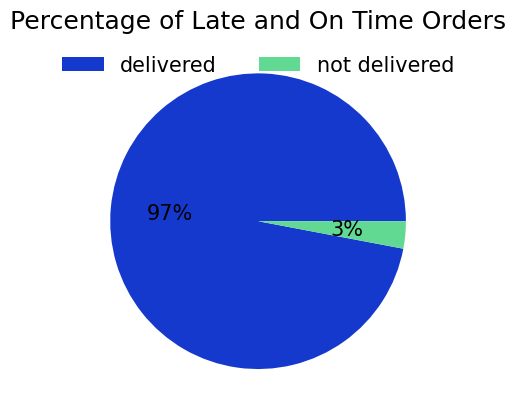

In [90]:
# utwórz wykres przedstawiający odsetek zamówień dostarczonych na czas i spóźnionych
fig, ax = plt.subplots()
ax.pie(count_of_orders_per_order_status_pivot["%"], labels=["",""], autopct='%1.f%%', colors=colors)

ax.legend(labels=count_of_orders_per_order_status_pivot["if delivered"], loc='upper center', frameon=False, ncol=2)

ax.set_title('Percentage of Late and On Time Orders')
plt.show()

## Wyniki Sprzedażowe na Przestrzeni Kwartałów

Omawiany zbiór danych zawiera informacje na temat zamówień z drugiej połowy 2016 roku, 2017 roku oraz pierwszego kwartału roku 2018. Ze względu na **niekompletność danych z lat 2016 i 2018**, analiza została **ograniczona do okresu: 01.01.2017 - 31.12.2017**. 

Daty zostały pogrupowane na **kwartały oraz miesiące** w celu przedstawienia zegragowanych wniosków.   

In [91]:
# utwórz tabelę zawierającą wyłącznie kolumny z numerem zamówienia, datą zamówienia oraz wartością zamówienia
results_per_year = orders.loc[:, ['order_id', 'order_purchase_date', 'payment_value']]

# utwórz dodatkowe kolumny bazując na dacie zamówienia zawierające: kwartał, rok, dzień oraz miesiąc
results_per_year['Quarter'] = results_per_year['order_purchase_date'].dt.quarter
results_per_year['Year'] = results_per_year['order_purchase_date'].dt.year
results_per_year['Day'] = results_per_year['order_purchase_date'].dt.day
results_per_year['Month'] = results_per_year['order_purchase_date'].dt.month

# utwórz kolumnę łączącą informację na temat kwartału i roku zamówienia
results_per_year['Quarter - Year'] = 'Q' + results_per_year['Quarter'].astype(str) + ' ' + results_per_year['Year'].astype(str)

# przekształć typ danych daty zamówienia z daty/godziny do daty
results_per_year['order_purchase_date'] = results_per_year['order_purchase_date'].dt.date

results_per_year = results_per_year[results_per_year["payment_value"]>0.0]

# usuń duplikaty zamówień
results_per_year = results_per_year.drop_duplicates(subset='order_id')

results_per_year.head()

,order_id,order_purchase_date,payment_value,Quarter,Year,Day,Month,Quarter - Year
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,18.12,4,2017,2,10,Q4 2017
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,141.46,3,2018,24,7,Q3 2018
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,179.12,3,2018,8,8,Q3 2018
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,72.20,4,2017,18,11,Q4 2017
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,28.62,1,2018,13,2,Q1 2018


In [92]:
# utwórz tabelę przestawną dla 2017 roku z sumą wartości zamówień oraz liczbą zamówień w poszczególnych kwartałach
quarterly_breakdown = results_per_year[results_per_year['Year']==2017].pivot_table(index='Quarter - Year', values=['payment_value', 'order_id'], aggfunc={'payment_value': 'sum', 'order_id': 'count'})

# resetuj indeks, aby 'Quarter - Year' było kolumną
quarterly_breakdown = quarterly_breakdown.reset_index()

# zmień nazwy kolumn
quarterly_breakdown = quarterly_breakdown.rename(columns={'payment_value': 'Total Revenue', "order_id": "Count of Orders"})

# uporządkuj dane w kolejności chronologicznej
quarterly_breakdown = quarterly_breakdown.sort_values('Quarter - Year', ascending=True)

quarterly_breakdown

,Quarter - Year,Count of Orders,Total Revenue
0,Q1 2017,5262,865871.89
1,Q2 2017,9349,1488581.57
2,Q3 2017,12642,1952726.36
3,Q4 2017,17848,2806540.12


Na poniższych wykresach zawierających całkowity przepływ pieniędzy oraz całkowitą liczbę zamówień w poszczególnych kwartałach 2017 roku, O-List cieszyło się stale rosnącym zainteresowaniem wśród konsumentów. 

Liczba zamówień w pierwszym kwartale była równa **5 262**, a ich całkowita wartość wyniosła **865 872 BRL**. W drugim kwartale liczba zamówień wzrosła do **9 349** (o łącznej wartości **1 488 582 realów brazylijskich**), co oznacza wzrost o **44% względem Q1**. Trzeci kwartał przyniósł O-List kolejny wzrost w liczbie zamówień **12 642** (warte **1 952 726 BRL**). Najwięcej zamówień (**17 848**) i najwyższe zyski (**2 806 540 realów brazylijskich**) przedsiębiorstwo osiągnęło w ostatnim kwartale 2017. Rosnący trend zdaje się również utrzymywać na początku 2018 roku. 

[Text(0.5, 0, '')]

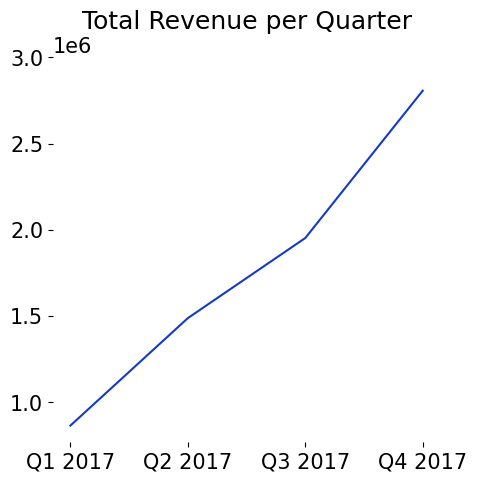

In [93]:
# utwórz wykres liniowy dla całkowitego zarobku na przestrzeni kwartałów
ax = quarterly_breakdown.plot(x='Quarter - Year', y='Total Revenue', kind='line', color=colors, legend=False, figsize=(5, 5), title="Total Revenue per Quarter")

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
plt.yticks([1000000, 1500000, 2000000, 2500000, 3000000])
        
ax.set(xlabel=None)

Wyniki 

[Text(0.5, 0, '')]

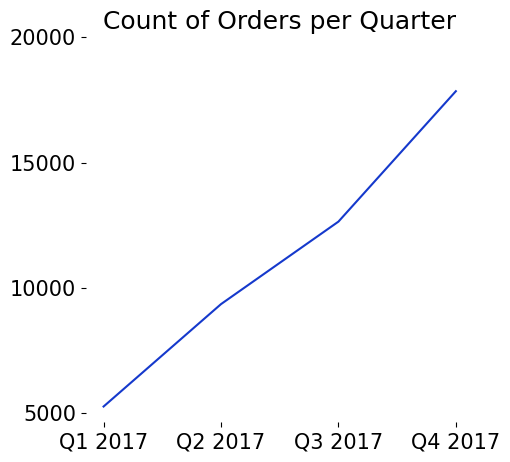

In [94]:
# utwórz wykres liniowy dla liczby zamówień na przestrzeni kwartałów
ax = quarterly_breakdown.plot(x='Quarter - Year', y='Count of Orders', color=colors, legend=False, figsize=(5, 5), title="Count of Orders per Quarter")

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)

plt.yticks([5000, 10000, 15000, 20000])
    
ax.set(xlabel=None)

Poniższa wizualizacja przedstawia rozkład całkowitych wartości zamówień w podziale na miesiące 2017 roku. Widoczna jest na niej stabilizacja trendu wraz z ubiegiem miesięcy. W pierwszym kwartale wartości przychodów przyjmują najwyższe różnice, które zmniejszają się z upływem czasu. Ostatnie miesiące cechują się większą regularnością sum przepływających przez O-List. 

Co ciekawe, specjalne okazje (takie jak święta czy *Black Friday*, który w Brazylii 2017 roku wypadał 24 listopada) nie prowadzą do zwiększenia przychodów platformy. W celu wyciągnięcia bardziej dogłębnych wniosków, analiza ta powinna zostać uzupełniona o kontekt kulturowy brazylijskiego społeczeństwa i jego tendencji konsumerskich.  

C:\Users\lubin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x23c645c2710>,
 [Text(1, 0, '1'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30')])

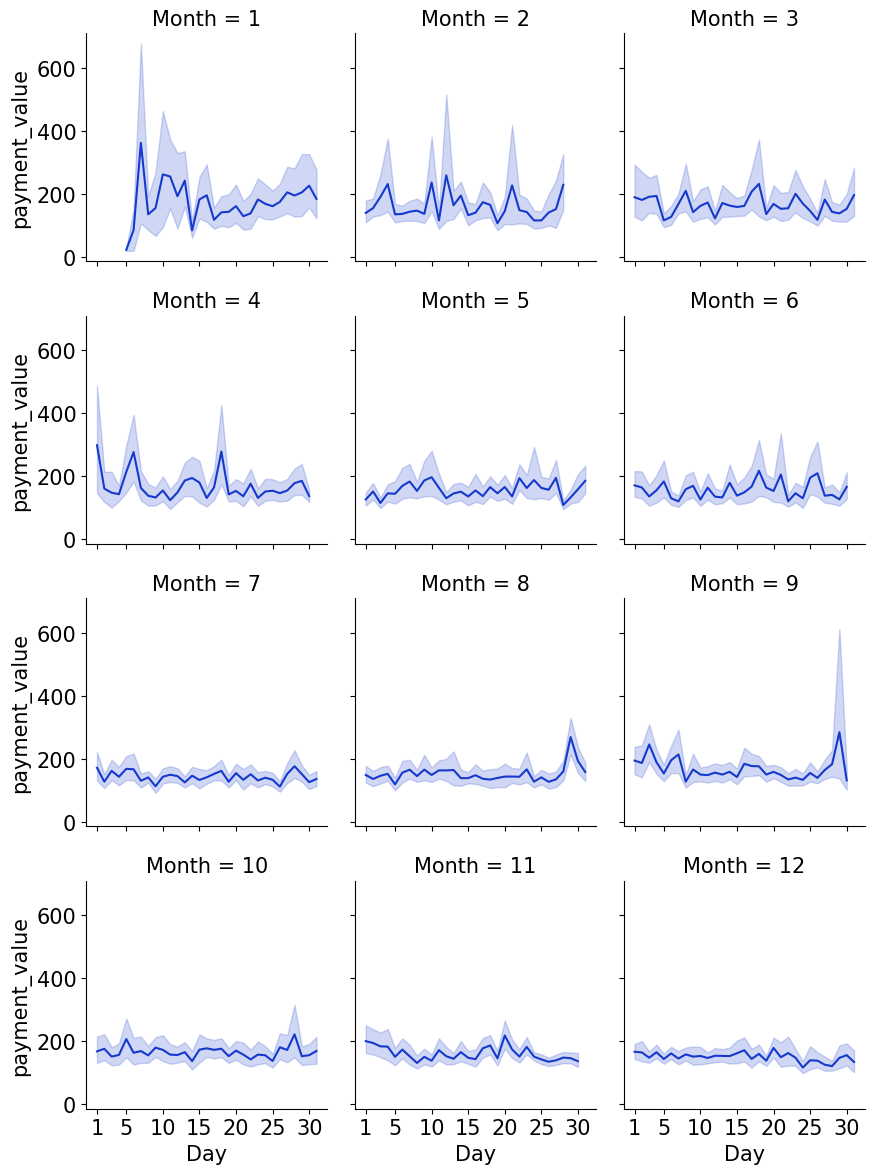

In [95]:
# utwórz wykres fasetowy dla poszczególnych miesięcy z całkowitą wartością zamówień
monthly_revenue_chart = sns.FacetGrid(results_per_year[results_per_year['Year']==2017], col="Month", col_wrap=3)
monthly_revenue_chart.map_dataframe(sns.lineplot, x="Day", y="payment_value", color='#1539CC')

plt.xticks([1, 5, 10, 15, 20, 25, 30])

## Wyniki Sprzedażowe w Podziale na Stany

O-List działa jako platforma ogólnokrajowa, dzięki czemu swoje usługi oferuje ona użytkownikom ze wszystkich zakątków Brazylii. Różni się ona jednak swoją popularnością w poszczególnych stanach co widać w przypadku uzyskanych dochodów, liczby zamówień czy liczby użytkowników.

W celu wykonania powyższej analizy utworzona została pomocnicza ramka danych zawierająca zagregowane na poziomie stanów informacje na temat:
* liczby zamówień
* uzyskanych przychodów
* liczby i odsetka użytkowników (z podziałem na klientów i sprzedawców)
* statystyk o danym regionie (pobranych wcześniej z Wikipedii):
    * GDP
    * HDI
    * populacja
    * obszar


In [96]:
# utwórz tabelę przestawną z całkowitą kwotą zarobków strony, liczbą zamówień oraz liczbą klientów na stan
results_per_state = orders.pivot_table(index='customer_state', values=["payment_value", "order_id", "customer_id"], aggfunc={"payment_value": 'sum', "order_id": "nunique", "customer_id": "nunique"})

# zresetuj indeks
results_per_state = results_per_state.reset_index()

# odrzuć wszystkie zamówienia, których wartość jest mniejsza od 0.0
results_per_state = results_per_state[results_per_state["payment_value"]>0.0]

# utwórz tabelę przestawną z liczbą sprzedwców na stan
sellers_per_state = orders.pivot_table(index='seller_state', values="seller_id", aggfunc="nunique")

# zresetuj indeks
sellers_per_state = sellers_per_state.reset_index()

# połącz obie tabele przestawne
results_per_state = results_per_state.merge(sellers_per_state, left_on='customer_state', right_on='seller_state', how='left')

# posortuj wartości w kolumnie payment_value w kolejności rosnącej
results_per_state = results_per_state.sort_values('payment_value', ascending=True)

# połącz tabelę przestawną z informacjami o stanach z tabeli głównej
results_per_state = results_per_state.merge(orders[['customer_state', 'customer_state_area', 'customer_state_population', 'customer_state_GDP', 'customer_state_HDI']], on='customer_state', how='left')

# zmień nazwy kolumn
results_per_state = results_per_state.rename(columns={'customer_state': 'State', 
                                                      'payment_value': 'Total Revenue', 
                                                      'order_id': 'Count of Orders', 
                                                      'customer_id': "Count of Customers", 
                                                      "seller_id": "Count of Sellers"})

# usuń duplikaty
results_per_state = results_per_state.drop_duplicates(subset="State")

# zmień braki danych w kolumnie Count of Sellers na 0
results_per_state['Count of Sellers'] = results_per_state['Count of Sellers'].fillna(0)

# zmień typ danych w kolumnie Count of Sellers na liczby całkowite
results_per_state['Count of Sellers'] = results_per_state['Count of Sellers'].astype(int)

# utwórz kolumnę z liczbą użytkowników, która jest sumą klientów i sprzedawców
results_per_state['Count of Users'] = results_per_state['Count of Customers'] + results_per_state['Count of Sellers']

# oblicz odsetek klientów pośród wszystkich użytkowników
results_per_state["% of Customers"] = round(results_per_state["Count of Customers"] / results_per_state["Count of Users"] * 100, 0)

# oblicz odsetek sprzedawców pośród wszystkich użytkowników
results_per_state["% of Sellers"] = round(results_per_state["Count of Sellers"] / results_per_state["Count of Users"] * 100, 0)

# pozostaw tylko wybrane kolumny i uporządkuj je
results_per_state = results_per_state.loc[:, ['State', 'Total Revenue', 'Count of Orders', 'Count of Users', 'Count of Customers', '% of Customers', "Count of Sellers", "% of Sellers", 'customer_state_area', 'customer_state_population', 'customer_state_GDP', 'customer_state_HDI']]

results_per_state.head()

,State,Total Revenue,Count of Orders,Count of Users,Count of Customers,% of Customers,Count of Sellers,% of Sellers,customer_state_area,customer_state_population,customer_state_GDP,customer_state_HDI
0,Roraima,12462.21,46,46,46,100.0,0,0.0,224301,708352,8000,0.752
52,Amapá,21642.70,68,68,68,100.0,0,0.0,142829,904535,9000,0.740
136,Acre,24984.86,81,82,81,99.0,1,1.0,164123,942123,21000,0.719
231,Amazonas,34956.93,148,149,148,99.0,1,1.0,1559159,4235555,103000,0.733
404,Rondônia,69184.48,253,255,253,99.0,2,1.0,237591,1837905,19000,0.725


Na zaprezentowanym poniżej wykresie widoczne są różnice w całkowitych kwotach przepływających przez platformę na podstawie zamówień klientów z danych stanów.

Najwięcej przychodów przyniosły platformie takie stany jak:
* **Sao Paulo, gdzie ich wartość wyniosła aż 7 726 047 R$**
* Rio de Janeiro
* Minas Gerais
* Rio Grande do Sul
* Parana

Najniższe przychody platforma osiągała natomiast w:
* **Roraima, gdzie łączna wartość zamówień była najniższa - 12 462 realów brazylijskich**
* Amapa
* Acre
* Amazonas

[Text(0, 0.5, '')]

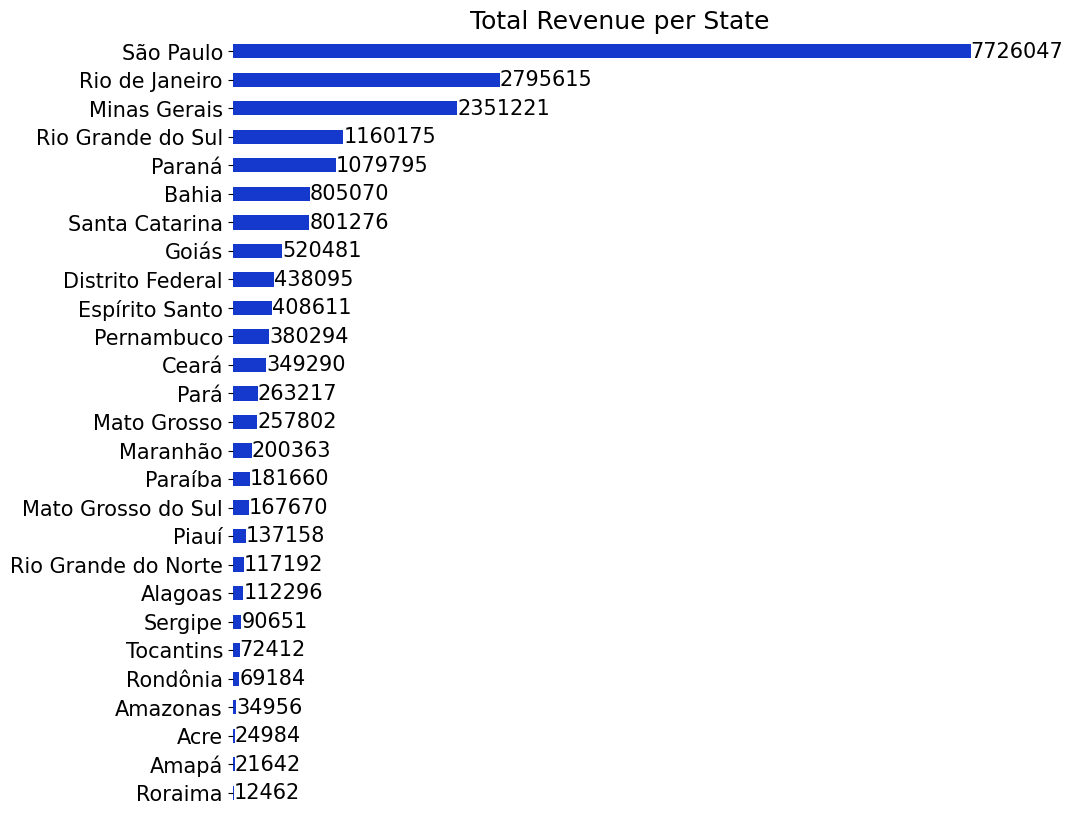

In [97]:
# utwórz wykres kolumnowy przedstawiający całkowitą wartość zamówień w poszczególnych stanach
ax = results_per_state.plot(x='State', y='Total Revenue', kind='barh', color='#1539CC', legend=False, figsize=(10, 10), title="Total Revenue per State")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(ylabel=None)

Warto podkreślić, że **stany o najwyższych przychodach okazują się być także stanami, w których O-List zgromadziło najwięcej zamówień**. Oznacza to więc, że im więcej zamówień składają klienci z danego regionu, tym więcej pieniędzy zarabia platforma w tym samym regionie. 

[Text(0, 0.5, '')]

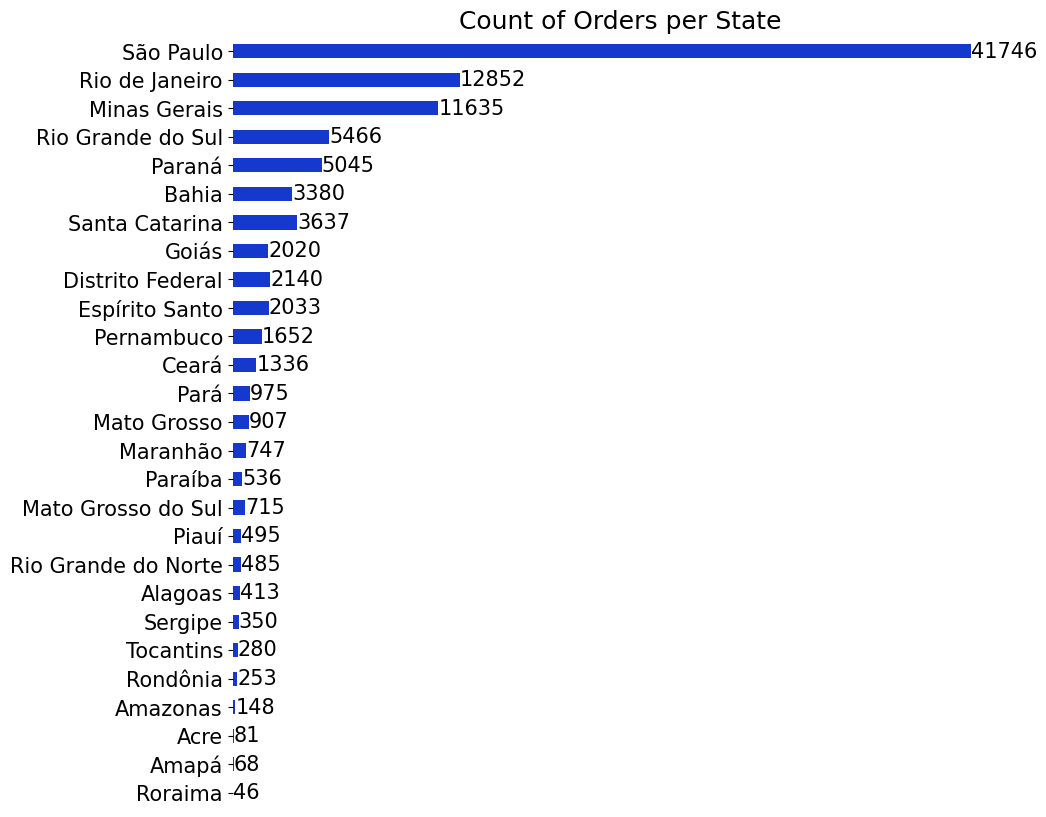

In [98]:
# utwórz wykres kolumnowy przedstawiający całkowitą ilość zamówień w poszczególnych stanach
ax = results_per_state.plot(x='State', y='Count of Orders', kind='barh', color='#1539CC', legend=False, figsize=(10, 10), title="Count of Orders per State")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(ylabel=None)

Okazuje się, że tak duże **rozbieżności w wynikach platformy w poszczególnych stanach można uzasadnić warunkami socjo-ekonomicznymi** w nich występującymi. Z wyliczonych poniżej współczynników korelacji oraz uzupełniających je wykresów regresji liniowych jasno wynika, że przychody O-List w danym stanie zależą od jego:
1. populacji
2. wartości GDP
3. wartości HDI

W przypadku wszystkich trzech czynników występuje pozytywna zależność pomiędzy ich wartością o całkowitym przychodem platformy, co oznacza że:
1. **im więcej ludzi mieszka w danym stanie, tym wyższe przychody osiąga O-List**
2. **im wyższą wartość przyjmuje Produkt Krajowy Brutto (GDP), tym wyższe przychody osiąga O-List**
3. **im wyższą wartość przyjmuje Wskaźnika Rozwoju Społecznego (HDI), tym wyższe przychody osiąga O-List**

Podsumowując, platforma może liczyć na lepsze wyniki w przypadku regionów szybko rozwijających się i o dużym zaludnieniu. 

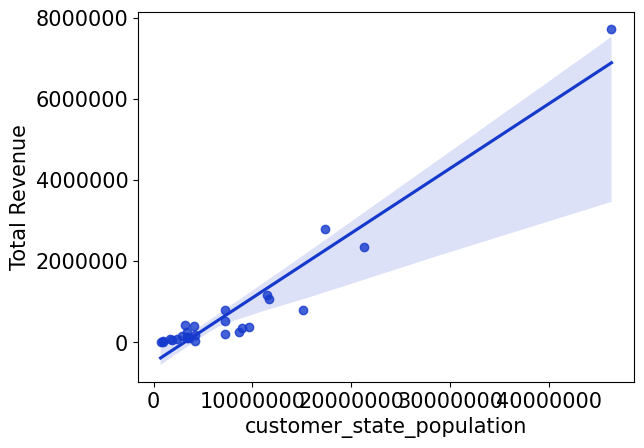

In [99]:
# utwórz wykres regresji liniowej ukazujący zależność między populacją stanu a całkowitym przychodem
sns.regplot(data=results_per_state, x="customer_state_population", y="Total Revenue", color="#1539CC")
plt.ticklabel_format(style = 'plain')

In [100]:
# oblicz współczynnik korelacji Pearsona dla zależności między populacją stanu a całkowitym przychodem 
correlation_coefficient, p_value = pearsonr(results_per_state['customer_state_population'], results_per_state['Total Revenue'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9588498264963465
P-value: 3.508633136524278e-15


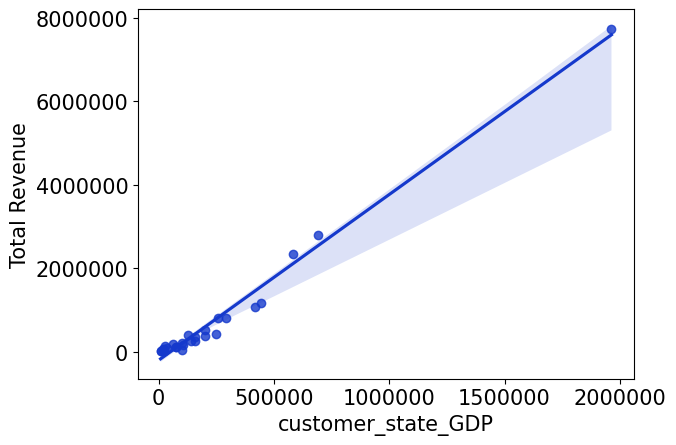

In [101]:
# utwórz wykres regresji liniowej ukazujący zależność między GDP stanu a całkowitym przychodem
sns.regplot(data=results_per_state, x="customer_state_GDP", y="Total Revenue", color="#1539CC")
plt.ticklabel_format(style = 'plain')

In [102]:
# oblicz współczynnik korelacji Pearsona dla zależności między GDP stanu a całkowitym przychodem 
correlation_coefficient, p_value = pearsonr(results_per_state['customer_state_GDP'], results_per_state['Total Revenue'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9920923097998321
P-value: 4.66453024864711e-24


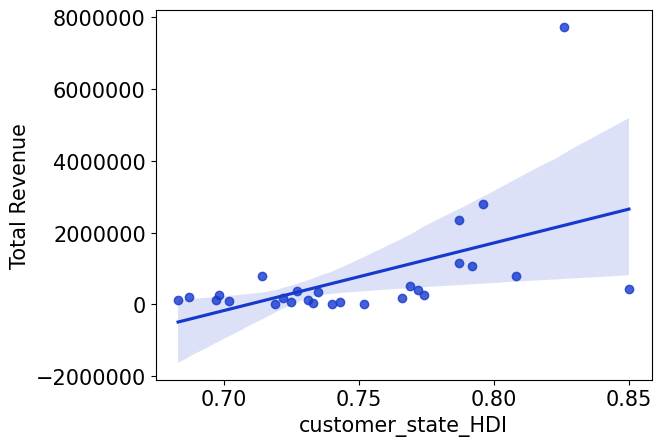

In [103]:
# utwórz wykres regresji liniowej ukazujący zależność między HDI stanu a całkowitym przychodem
sns.regplot(data=results_per_state, x="customer_state_HDI", y="Total Revenue", color="#1539CC")
plt.ticklabel_format(style = 'plain')

In [104]:
# oblicz współczynnik korelacji Pearsona dla zależności między HDI stanu a całkowitym przychodem 
correlation_coefficient, p_value = pearsonr(results_per_state['customer_state_HDI'], results_per_state['Total Revenue'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.5273099236425499
P-value: 0.00470792063341776


Stany Brazylii różnią się nie tylko pod względem wyników finansowych, ale też pod względem rozkładu grupy użytkowników. Z racji, że **w żadnym z nich odsetek sprzedawców nie przekracza 10% wśród wszystkich użytkowników platformy**, O-List mierzy się z problemem wysokich dysproporcji jeśli chodzi o liczbę sprzedawców i klientów. 

Największe "zaplecza" osób wystawiających produkty na sprzedaż platforma posiada w **Paranie (6%), Santa Catarinie (5%) czy Sao Paulo (4%)**. Jednakże w stanach takich jak **Roraima, Para, Maranhao czy Piaui odsetek sprzedawców jest niższy niż 1%**.

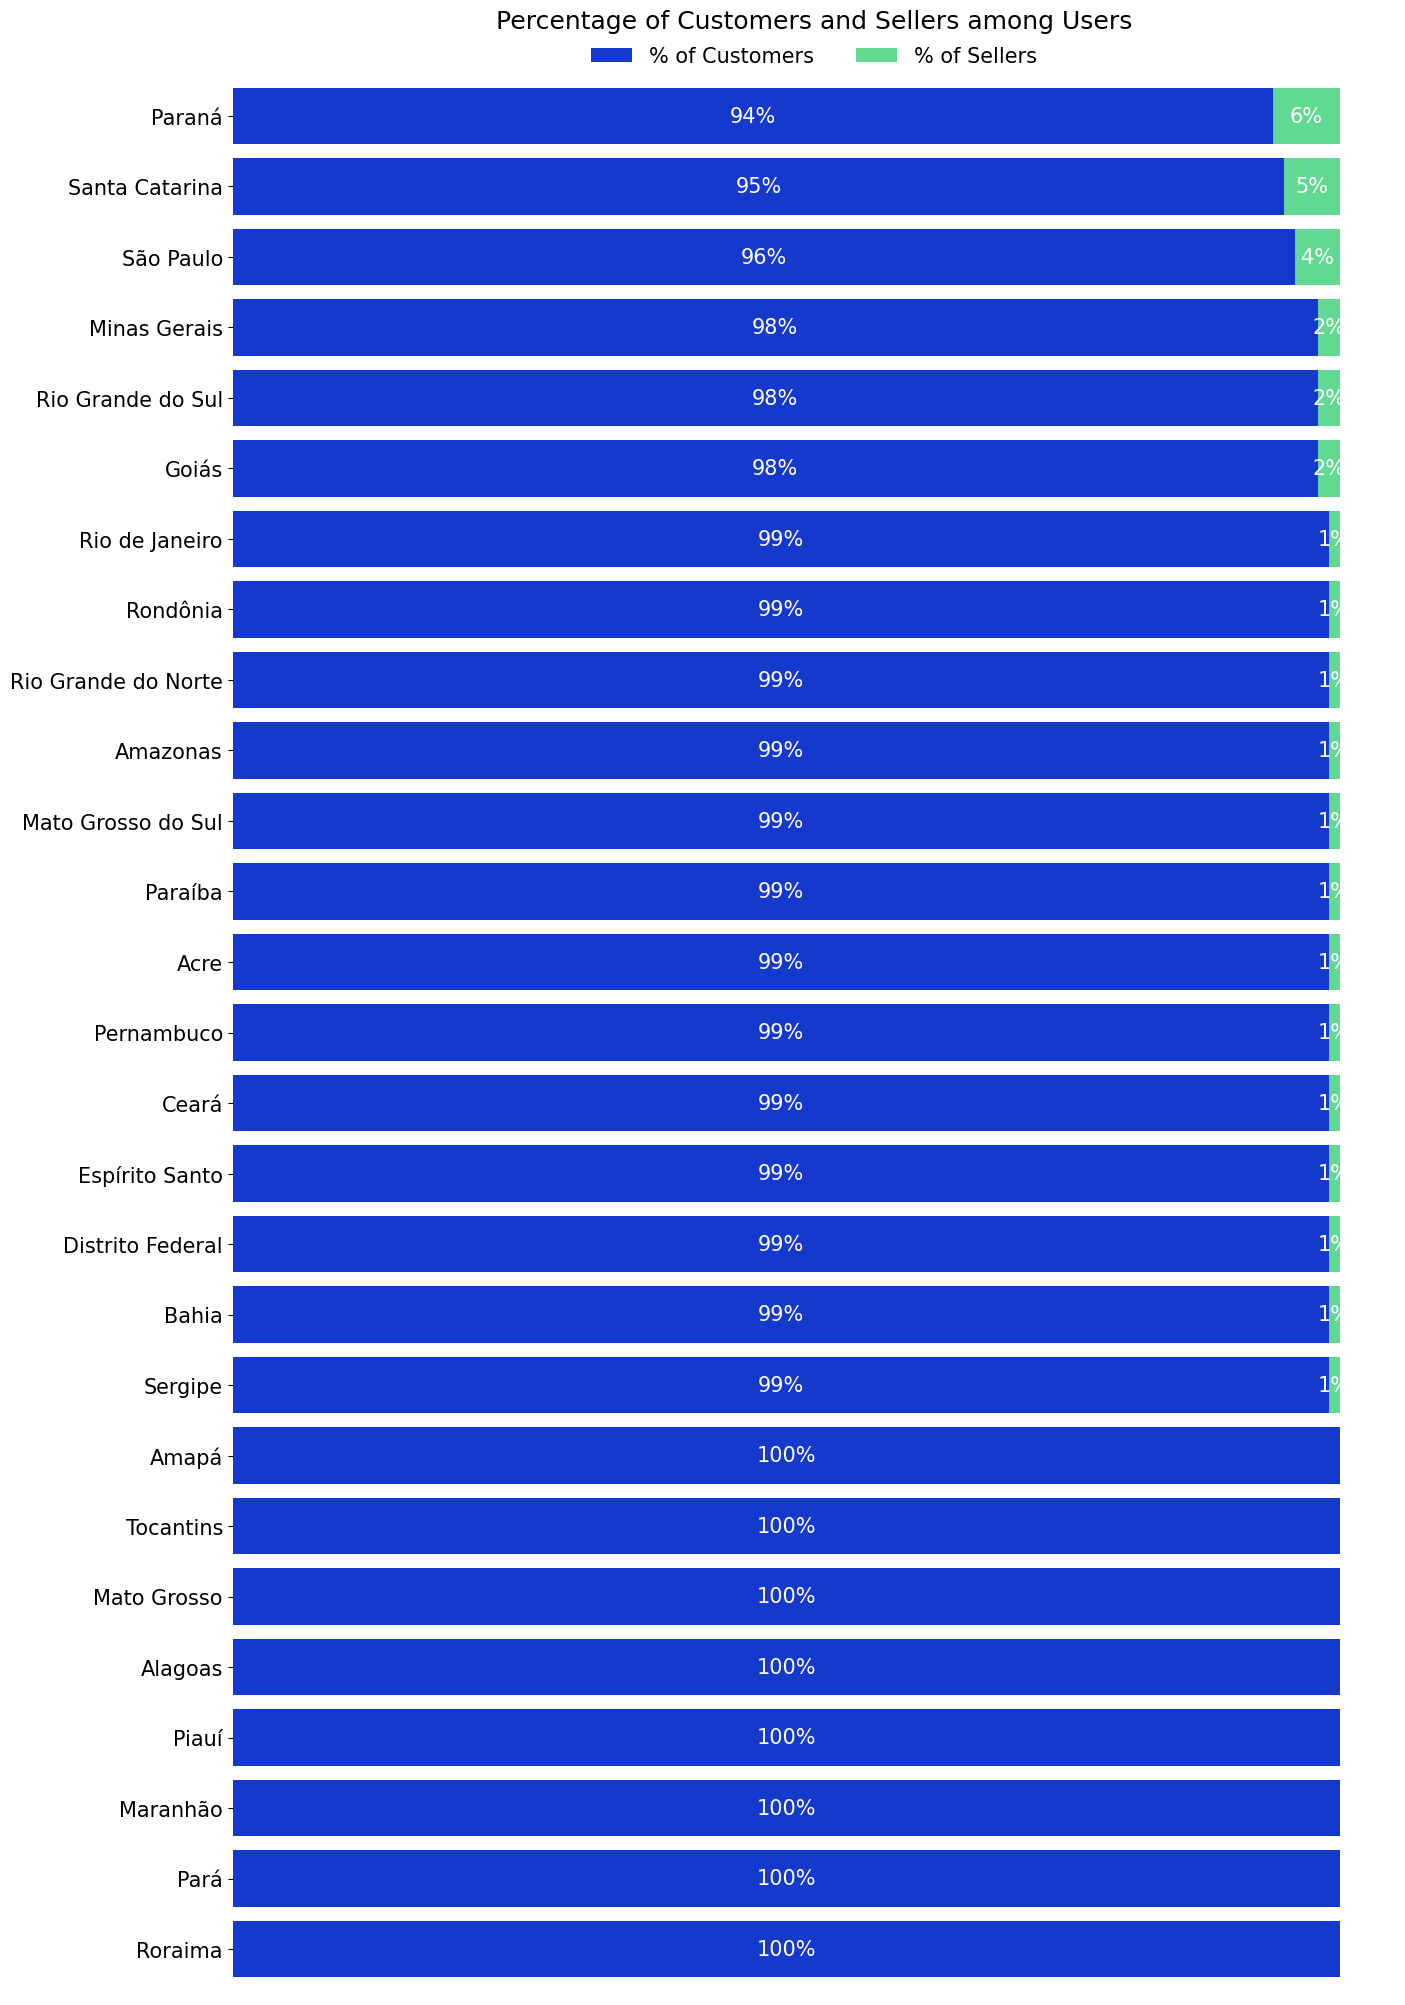

In [105]:
# posortuj wartości w kolumnie '% of Sellers' w kolejności malejącej
results_per_state = results_per_state.sort_values('% of Sellers', ascending=True)

# oblicz średni odsetek klientów
total_percentage_of_customers = results_per_state["% of Customers"].mean()

# oblicz średni odsetek sprzedawców
total_percentage_of_sellers = results_per_state["% of Sellers"].mean()

# utwórz wykres kolumnowy-skumulowany przedstawiający odsetek sprzedawców i klientów w poszczególnych stanach
ax = results_per_state.plot(x='State', y=["% of Customers", "% of Sellers"], kind='barh', stacked=True, color=colors, width=0.8, figsize=(15, 25), title="Percentage of Customers and Sellers among Users")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [f"{int(i)}%" if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="center", color="white")
    
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.022))
    
ax.set_title(label="Percentage of Customers and Sellers among Users", pad=30)
ax.set(ylabel=None)

plt.rcParams['font.size'] = 15

Podobnie jak w przypadku dochodów czy liczby zamówień, **liczba sprzedawców zależna jest od populacji danego stanu**. Im większa liczba ludności zamieszkuje stan, tym więcej użytkowników loguje się do O-List w celu wystawienia swoich produktów na sprzedaż.  

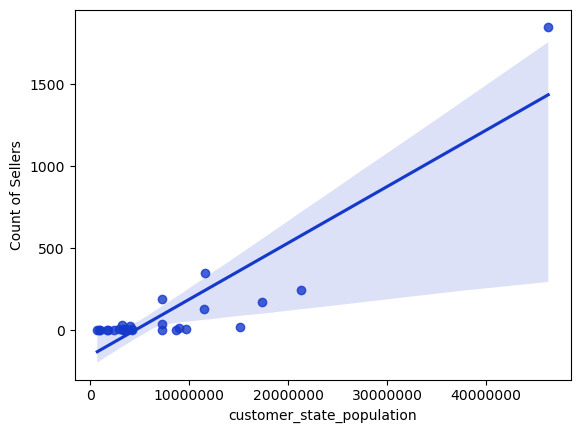

In [140]:
# utwórz wykres regresji liniowej ukazujący zależność między populacją stanu a liczbą użytkowników
sns.regplot(data=results_per_state, x="customer_state_population", y="Count of Sellers", color="#1539CC")
plt.ticklabel_format(style = 'plain')

In [141]:
# oblicz współczynnik korelacji Pearsona dla zależności między populacją stanu a liczbą sprzedawców
correlation_coefficient, p_value = pearsonr(results_per_state['customer_state_population'], results_per_state['Count of Sellers'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.8931928496456452
P-value: 3.6823954159680686e-10


## Sprzedaże Międzystanowe

Pomimo różnej popularności, O-List funkcjonuje na terenie całej Brazylii, co oznacza, że platforma dopuszcza zamówienia międzystanowe. 

Na potrzeby poniższej analizy, utworzona została dodatkowa kolumna, która przyjmuje wartości *Same State* (*wewnątrzstanowa*), kiedy klient i sprzedawca pochodzą z tego samego stanu, bądź *Different States* (*międzystanowe*), gdy klient i sprzedawca pochodzą z różnych stanów. 

Okazuje się, że **63 962 zamówień (64%) miało charakter dostawy międzystanowej, a 35 479 wewnątrzstanowej (36%)**.

In [108]:
# utwórz ramkę danych z kolumnami 'order_id', 'customer_state', 'seller_state'
interstate_orders = orders.loc[:, ['order_id', 'customer_state', 'seller_state']]

# utwórz kolumnę warunkową która sprawdza czy klient i sprzedawca są z tego samego stanu (Same State jeśli tak, Different States jeśli nie)
interstate_orders['same_state'] = interstate_orders['customer_state'] == interstate_orders['seller_state']
interstate_orders['same_state'] = interstate_orders['same_state'].map({True: 'Same State', False: 'Different States'})

# usuń duplikaty z tabeli
interstate_orders = interstate_orders.drop_duplicates(subset="order_id")

interstate_orders.head()

,order_id,customer_state,seller_state,same_state
0,e481f51cbdc54678b7cc49136f2d6af7,São Paulo,São Paulo,Same State
3,53cdb2fc8bc7dce0b6741e2150273451,Bahia,São Paulo,Different States
4,47770eb9100c2d0c44946d9cf07ec65d,Goiás,São Paulo,Different States
5,949d5b44dbf5de918fe9c16f97b45f8a,Rio Grande do Norte,Minas Gerais,Different States
6,ad21c59c0840e6cb83a9ceb5573f8159,São Paulo,São Paulo,Same State


In [109]:
# utwórz tabelę przestawną z liczbą zamówień między- i wewnątrz- stanowych 
interstate_orders_pivot = interstate_orders.pivot_table(index='same_state', values='order_id', aggfunc = "count")

# oblicz odsetek zamówień między- i wewnątrz- stanowych 
interstate_orders_pivot["% of orders"] = round(interstate_orders_pivot['order_id'] / total_orders_count * 100, 0) 

# zresetuj indeks
interstate_orders_pivot = interstate_orders_pivot.reset_index()

# zmień nazwy kolumn
interstate_orders_pivot = interstate_orders_pivot.rename(columns={'same_state': "If the same states?", "order_id": "Count of Orders","% of orders": "% of All Orders"})

interstate_orders_pivot

,If the same states?,Count of Orders,% of All Orders
0,Different States,63962,64.0
1,Same State,35479,36.0


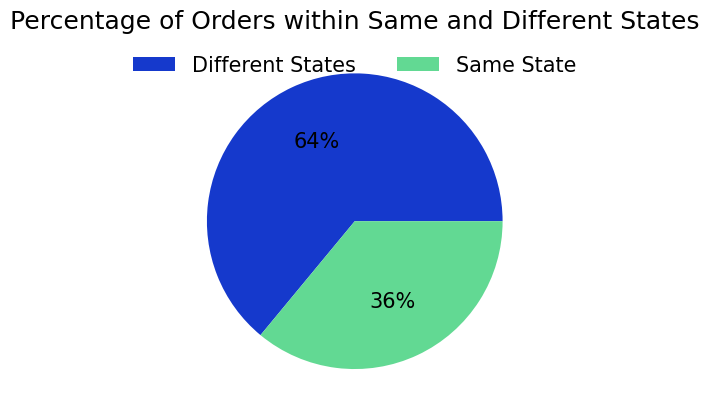

In [110]:
# utwórz wykres przedstawiający odsetek zamówień międzystanowych i wewnątrzstanowych
fig, ax = plt.subplots()
ax.pie(interstate_orders_pivot["% of All Orders"], labels=["",""], autopct='%1.f%%', colors=colors)

ax.legend(labels=interstate_orders_pivot["If the same states?"], loc='upper center', frameon=False, ncol=2)

ax.set_title('Percentage of Orders within Same and Different States')
plt.show()

## Czas Realizacji Zamówień

Jak wspomniano wcześniej, model biznesowy O-List Brazil opiera się na oferowanych przez nich usługach logistycznych. Z racji, że zamówienia rozwożone są po całym kraju, ich realizacja może wiązać się z różnym czasem trwania. W celu sprawdzenia skuteczności firmy w dostarczaniu produktów, zbiór danych został ograniczony wyłącznie do dostaw o statusie *"delivered"*. 

Następnie dodano kolumny zawierające informację o czasie trwania poszczególnych etapów zamówienia:
1. Potwierdzenie złożenia zamówienia
2. Dostarczenie zamówienia do przewoźnika
3. Dostarczenie zamówienia do klienta

Łączny czas trwania poszczególnych etapów został zawarty w kolumnie *Delivery Time*. Dodatkowo, wszystkie zamówienia zostały przyporządkowane do jednej z dwóch kategorii: 
* *on time* - dla zamówień dostarczonych na czas
* *late* - dla zamówień dostarczonych po przewidywanym terminie dostawy 

In [111]:
# utwórz ramkę danych z wybranymi kolumnami z głównej tabeli
orders_timelines = orders.loc[:, ['order_id', 'order_status', 'order_purchase_date', 'order_approval_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_to_logistic_partner_date']]

# usuń duplikaty zamówień
orders_timelines = orders_timelines.drop_duplicates(subset="order_id")

# przefiltruj wszystkie kolumny z datą na rok 2017, aby pozbyć się niepełnych rzędów
orders_timelines = orders_timelines[(orders_timelines['order_status']=="delivered")&(orders_timelines['order_purchase_date'].dt.year == 2017)&(orders_timelines['order_approval_date'].dt.year == 2017)&(orders_timelines['order_delivered_carrier_date'].dt.year == 2017)&(orders_timelines['order_delivered_customer_date'].dt.year == 2017)&(orders_timelines['order_estimated_delivery_date'].dt.year == 2017)&(orders_timelines['shipping_limit_to_logistic_partner_date'].dt.year == 2017)]

# zmień typ danych z kolumnach z datami, aby pozbyć sie godzin
for column in ['order_purchase_date', 'order_approval_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_to_logistic_partner_date']:
        orders_timelines[column] = orders_timelines[column].dt.date
    
# połącz ramkę danych z tabelą interstate_orders dla informacji na temat zamówień z tych samych i różnych stanów
orders_timelines = orders_timelines.merge(interstate_orders[["order_id","same_state"]], on='order_id', how='left')

# utwórz kolumnę zawierającą czas trwania 1 etapu dostarczania zamówienia (od zakupu do akceptacji)
orders_timelines['Stage 1: Purchase - Approval'] = orders_timelines['order_approval_date'] - orders_timelines['order_purchase_date']

# utwórz kolumnę zawierającą czas trwania 2  etapu dostarczania zamówienia (od akceptacji do przewoźnika)
orders_timelines['Stage 2: Approval - To Carrier'] = orders_timelines['order_delivered_carrier_date'] - orders_timelines['order_approval_date']

# utwórz kolumnę zawierającą czas trwania 3 etapu dostarczania zamówienia (od przewoźnika do klienta)
orders_timelines['Stage 3: To Carrier - To Customer'] = orders_timelines['order_delivered_customer_date'] - orders_timelines['order_delivered_carrier_date']

# utwórz kolumnę zawierająca całkowity czas trwania dostarczania zamówień
orders_timelines['Delivery Time'] = orders_timelines['Stage 1: Purchase - Approval'] + orders_timelines['Stage 2: Approval - To Carrier'] + orders_timelines['Stage 3: To Carrier - To Customer']

# utwórz kolumnę warunkową która określa czy zamówienie dotarło na czas czy było spóźnione
orders_timelines['if_late'] = np.where(orders_timelines['order_delivered_customer_date'] <= orders_timelines['order_estimated_delivery_date'], 'on time', 'late')

for i in range(len(orders_timelines)):
    orders_timelines["Delivery Time"][i] = orders_timelines["Delivery Time"][i].days

orders_timelines.head()

,order_id,order_status,order_purchase_date,order_approval_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_to_logistic_partner_date,same_state,Stage 1: Purchase - Approval,Stage 2: Approval - To Carrier,Stage 3: To Carrier - To Customer,Delivery Time,if_late
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2017-10-06,Same State,0:00:00,"2 days, 0:00:00","6 days, 0:00:00",8,on time
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,2017-11-23,Different States,0:00:00,"4 days, 0:00:00","10 days, 0:00:00",14,on time
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09,2017-07-09,2017-07-11,2017-07-26,2017-08-01,2017-07-13,Different States,0:00:00,"2 days, 0:00:00","15 days, 0:00:00",17,on time
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16,2017-05-16,2017-05-22,2017-05-26,2017-06-07,2017-05-22,Different States,0:00:00,"6 days, 0:00:00","4 days, 0:00:00",10,on time
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23,2017-01-25,2017-01-26,2017-02-02,2017-03-06,2017-01-27,Different States,"2 days, 0:00:00","1 day, 0:00:00","7 days, 0:00:00",10,on time


Średni czas realizacji wszystkich zamówień wynosi **12 dni**.

Na podstawie przedstawionego poniżej wyniku testu-T, możemy wnioskować, iż **zamówienia wewnątrzstanowe** (średni czas dostawy wynosi 8 dni) **są relizowane szybciej niż zamówienia międzystanowe** (średni czas dostawy wynosi 14 dni).

**Pierwszy etap zamówienia** (przyjęcie zakupu) trwa średnio **12 godzin dla zamówień w różnych stanach i 11 godzin dla zamówień w tych samych stanach**. **Dostarczenie produktu do dostawcy zajmuje natomiast 2 dni** bez względu na odległość między sprzedawcą a klientem. Największa różnica w średnim czasie dostawy dotyczy etapu trzeciego - **przekazanie produktu klientowi** - który zajmuje **5 dni przy zamówieniach w tym samym stanie i aż 10 dni dla zamówień międzystanowych**.

In [112]:
# oblicz średnią liczbę dni trwania realizacji zamówienia
average_delivery_time = orders_timelines['Delivery Time'].mean()

# utwórz tabelę przestawną ze średnimi czasami realizacji poszczególnych etapów zamówień
average_delivery_timelines = orders_timelines.pivot_table(index='same_state', values=["Stage 1: Purchase - Approval", 'Stage 2: Approval - To Carrier', "Stage 3: To Carrier - To Customer", "Delivery Time"], aggfunc = "mean")

# zresetuj indeks
average_delivery_timelines = average_delivery_timelines.reset_index()

In [113]:
# utwórz ramkę danych z zamówieniami w tym samym stanie
same_state_group = orders_timelines[orders_timelines['same_state']=="Same State"]

# pozostaw tylko kolumnę z czasem realizacji zamówienia
same_state_group = same_state_group.loc[:, ["Delivery Time"]]

# utwórz ramkę danych z zamówieniami w różnych stanach
different_state_group = orders_timelines[orders_timelines['same_state']=="Different States"]

# pozostaw tylko kolumnę z czasem realizacji zamówienia
different_state_group = different_state_group.loc[:, ["Delivery Time"]]

# oblicz test t studenta dla średniego czasu dostawy dla zamówień w różnych i tych samych stanach
t_statistic, p_value = ttest_ind(list(same_state_group["Delivery Time"]), list(different_state_group["Delivery Time"]))

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -66.27314610446476
P-value: 0.0


Wśród zakończonych zamówień, **najdłuższy czas dostawy wynosił 210 dni**. Natomiast **najszybciej dostarczone produkty zostały przekazane klientowi tego samego dnia**.

In [114]:
# podaj najkrótszy i najdłuższy czas trwania realizacji zamowienia
longest_delivery_time = max(orders_timelines['Delivery Time'])
shortest_delivery_time = orders_timelines['Delivery Time'].min()

Jak widać na poniższym wykresie, **zdecydowana większość zamówień (95%) została dostarczona w ramach przewidywanej daty dostawy**. Jedynie **5% zamówień okazało się być spóźnionych**, co oznacza że swoje produkty w późniejszym terminie otrzymało ponad **1 750 klientów**. 

In [115]:
# utwórz tabelę przestawną z liczbą zamówień spóźnioncyh i dostarczonych na czas
late_delivery_pivot = orders_timelines.pivot_table(index='if_late', values="order_id", aggfunc = "count")

# zresetuj indeks
late_delivery_pivot = late_delivery_pivot.reset_index()

# zmień nazwy kolumn
late_delivery_pivot = late_delivery_pivot.rename(columns={"if_late": "If Delivery Was Late", "order_id": "Count of Orders"})

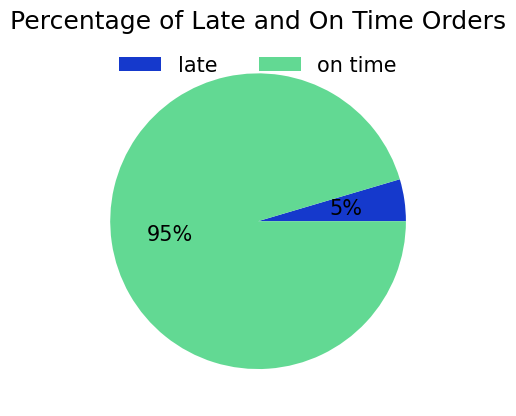

In [116]:
# utwórz wykres przedstawiający odsetek zamówień dostarczonych na czas i spóźnionych
fig, ax = plt.subplots()
ax.pie(late_delivery_pivot["Count of Orders"], labels=["",""], autopct='%1.f%%', colors=colors)

ax.legend(labels=late_delivery_pivot["If Delivery Was Late"], loc='upper center', frameon=False, ncol=2)

ax.set_title('Percentage of Late and On Time Orders')
plt.show()

## Wyniki Sprzedażowe w Kategoriach

Jak wynika z powyższych rozdziałów, O-List opiera swój model biznesowy o oferowanie indywiudalnym użytkownikom platformy do wymiany produktów. Dzięki temu, **w ofercie serwisu możemy znaleźć ponad 70 kategorii produktów**, które pogrupować można na takie grupy tematyczne jak: elektronika, narzędzia, wystrój domu, kosmetyki, rozrywka i wiele innych. 

Poszczególne kategorie różnią się jednak popularnością wśród klientów, co sprawia, że różnią się one zarówno uzyskiwanymi przychodami, jak i liczbą składanych zamówień. 

In [117]:
# utwórz ramkę danych z kolumnami z głównej tabeli
categories_df = orders.loc[:, ["order_id", "payment_value","item_price", "EN_product_category_name", "seller_id"]]

# usuń duplikaty z id zamówień
categories_df = categories_df.drop_duplicates(subset="order_id")

# wyfiltruj braki danych
categories_df = categories_df[(categories_df["payment_value"]>0.0)&(categories_df["item_price"]>0.0)&(categories_df["EN_product_category_name"]!='blank')]

# zmień kategorię 'home_appliances_2' na 'home_appliances'
categories_df['EN_product_category_name'] = categories_df['EN_product_category_name'].replace('home_appliances_2', 'home_appliances')

# zmień kategorię 'home_comfort_2' na 'home_comfort'
categories_df['EN_product_category_name'] = categories_df['EN_product_category_name'].replace('home_comfort_2', 'home_comfort')

# oblicz całkowitą liczę kategorii
number_of_categories = len(list(set(categories_df["EN_product_category_name"])))

In [118]:
# utwórz tabelę przestawną z liczbą zamówień, całkowitą wartością przychodu oraz średnią ceną produktów 
categories_df_pivot = categories_df.pivot_table(index='EN_product_category_name', values=["order_id", "payment_value", "item_price"], aggfunc = {"order_id": "count", "payment_value": "sum", "item_price": "mean"})

# resetuj indeks
categories_df_pivot = categories_df_pivot.reset_index()

# pozostaw tylko wybrane kolumny
categories_df_pivot = categories_df_pivot.loc[:, ['EN_product_category_name', 'order_id', 'item_price', 'payment_value']]

# zmień nazwy kolumn
categories_df_pivot = categories_df_pivot.rename(columns={'EN_product_category_name': "Category", 'order_id': "Count of Orders", 'item_price': "Average Product Price", 'payment_value': "Total Revenue"})

# oblicz średnią cenę wszystkich produktów
categories_df_pivot['Average Product Price'] = round(categories_df_pivot['Average Product Price'],2)

Z poniższego wykresu wynika, że do najczęściej zamawianych - o liczbie zamówień większej niż 5 000 - kategorii należą:
* akcesoria domowe do sypialni, kąpieli i jadalni
* kosmetyki & *beauty*
* sport i wypoczynek
* akcesoria komputerowe
* meble i wystrój
* drobne artykuły gospodarstwa domowego
* prezenty i zegarki

Użytkownicy O-List kupują zatem zarówno produkty do domu, jak i kosmetyki czy prezenty.

[Text(0, 0.5, '')]

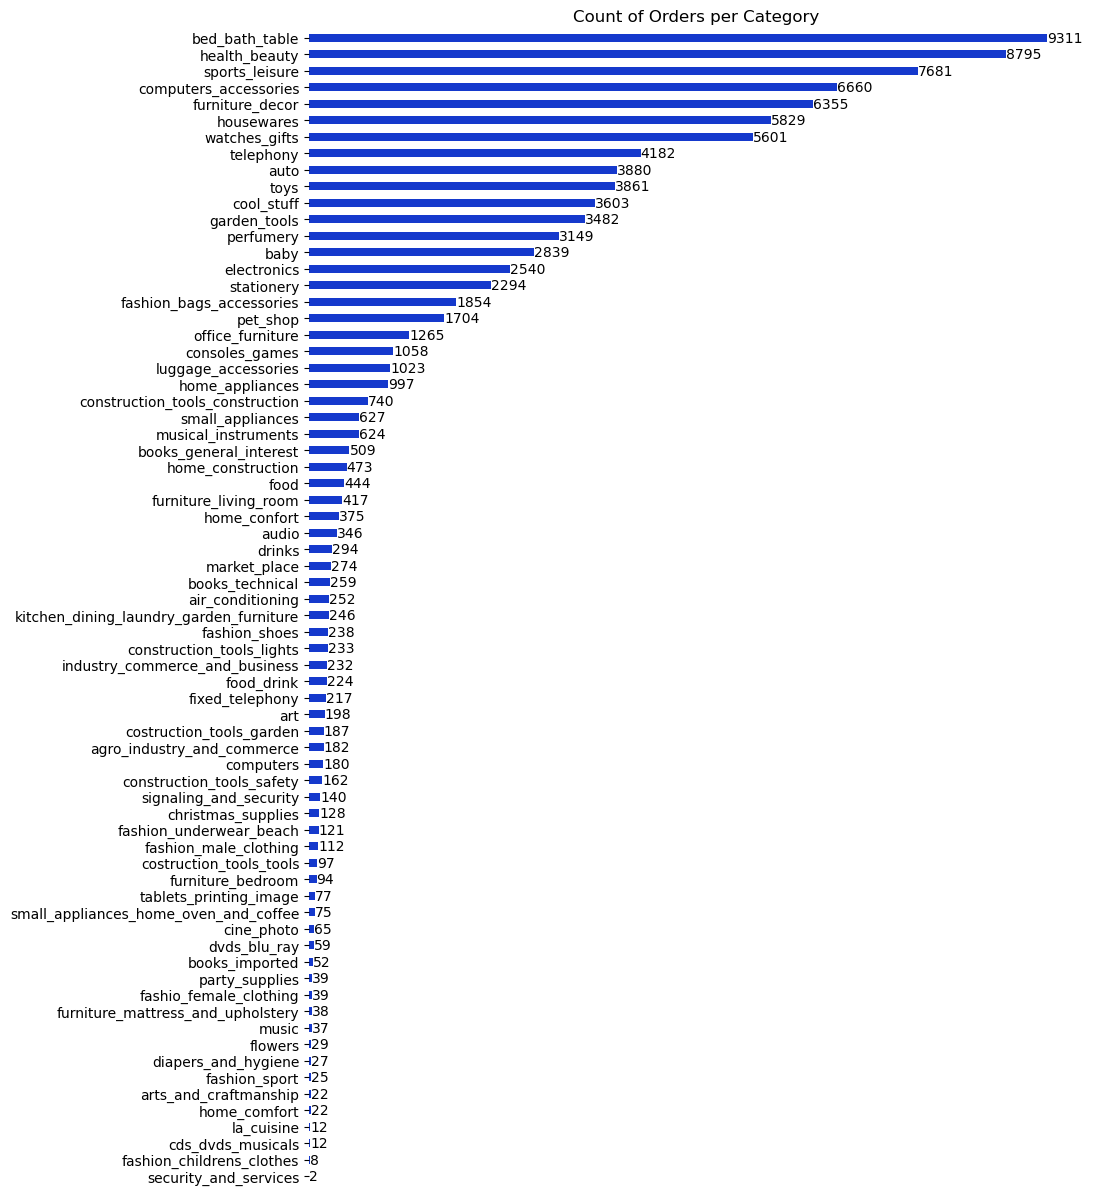

In [152]:
# posortuj wartości wg kolumny Count of Orders w kolejności rosnącej
categories_df_pivot = categories_df_pivot.sort_values("Count of Orders", ascending=True)

# utwórz wykres z liczbą zamówień na kategorię
ax = categories_df_pivot.plot(x='Category', y='Count of Orders', kind="barh", color='#1539CC', legend=False, figsize=(10, 15), title="Count of Orders per Category")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(ylabel=None)

Kategorie różnią się także cenami produktów wchodzącymi w ich skład. Na poniższym wykresie zaprezentowane średnie cen przedmiotów z poszczególnycyh grup.

Najdroższe okazują się być pozycje z kategorii komputery, dla których średnia cena przekracza 1 000 realów brazylijskich. Następnie znajdują się drobne urządzenia domowe do gotowania i kawy (dla których średnia cena wynosi 624 R$). 

Najtańszą, nieprzekraczającą 50 realów, grupą produktową są natomiast: 
* *home_comfort*
* kwiaty
* pieluchy i higiena

[Text(0, 0.5, '')]

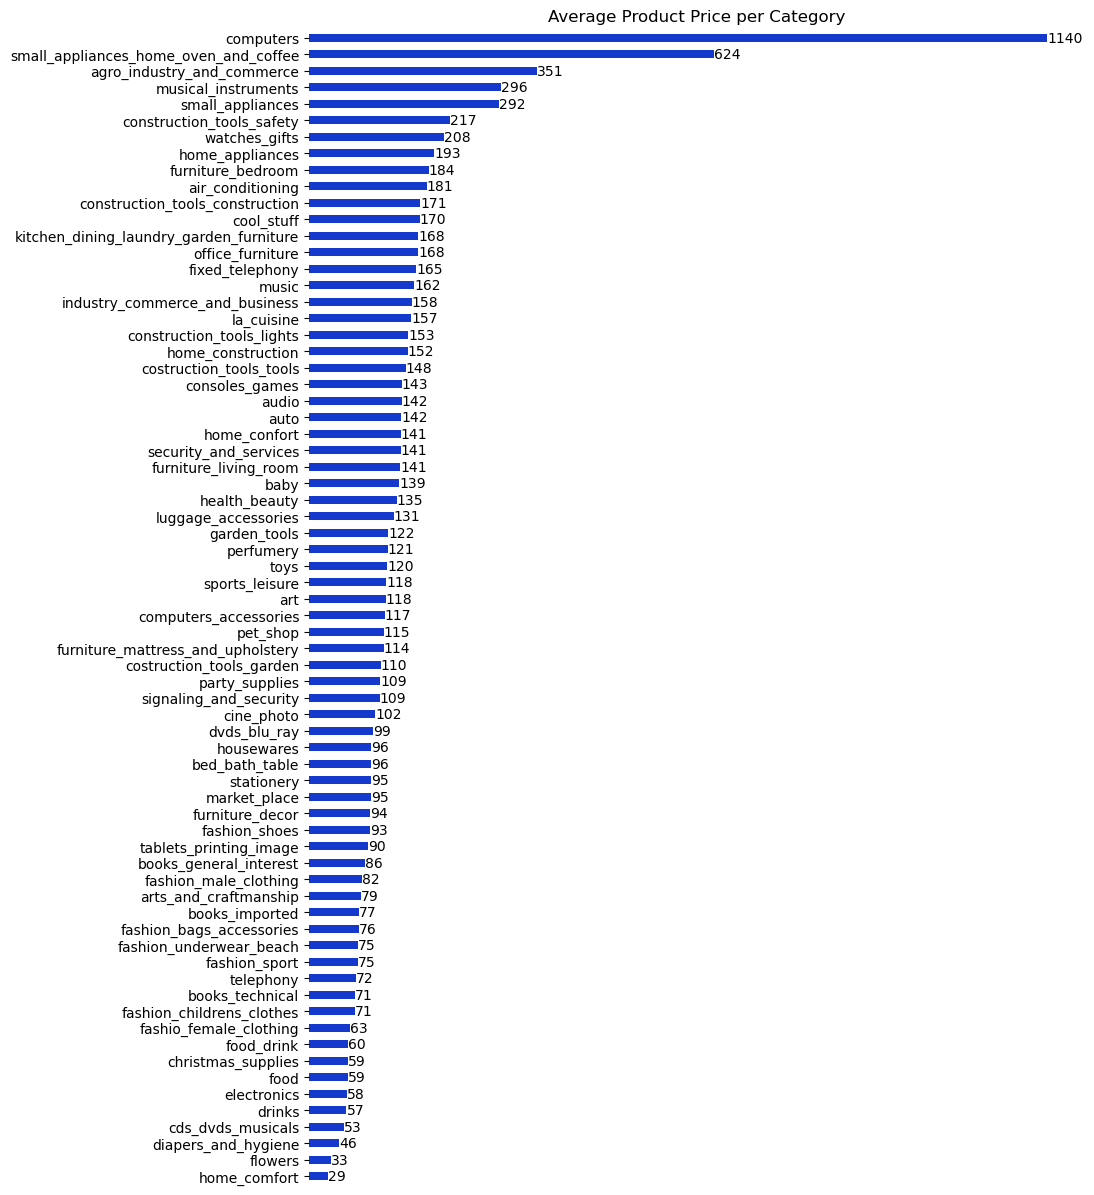

In [153]:
# posortuj wartości wg kolumny Average Product Price w kolejności rosnącej
categories_df_pivot = categories_df_pivot.sort_values("Average Product Price", ascending=True)

# utwórz wykres ze średnią ceną produktu na kategorię
ax = categories_df_pivot.plot(x='Category', y='Average Product Price', kind="barh", color='#1539CC', legend=False, figsize=(10, 15), title="Average Product Price per Category")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)

for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")

ax.set(ylabel=None)

Przychody osiągane przez poszczególne kategorie zdają się być powiązane z przypadającą na nie liczbą zamówień. Największe zyski pochodzą bowiem z najczęściej zamawianych produktów, wchodzących w skład takich grup jak:
* akcesoria domowe do sypialni, kąpieli i jadalni
* sport i wypoczynek
* akcesoria komputerowe
* meble i wystrój
* drobne artykuły gospodarstwa domowego
* prezenty i zegarki

[Text(0, 0.5, '')]

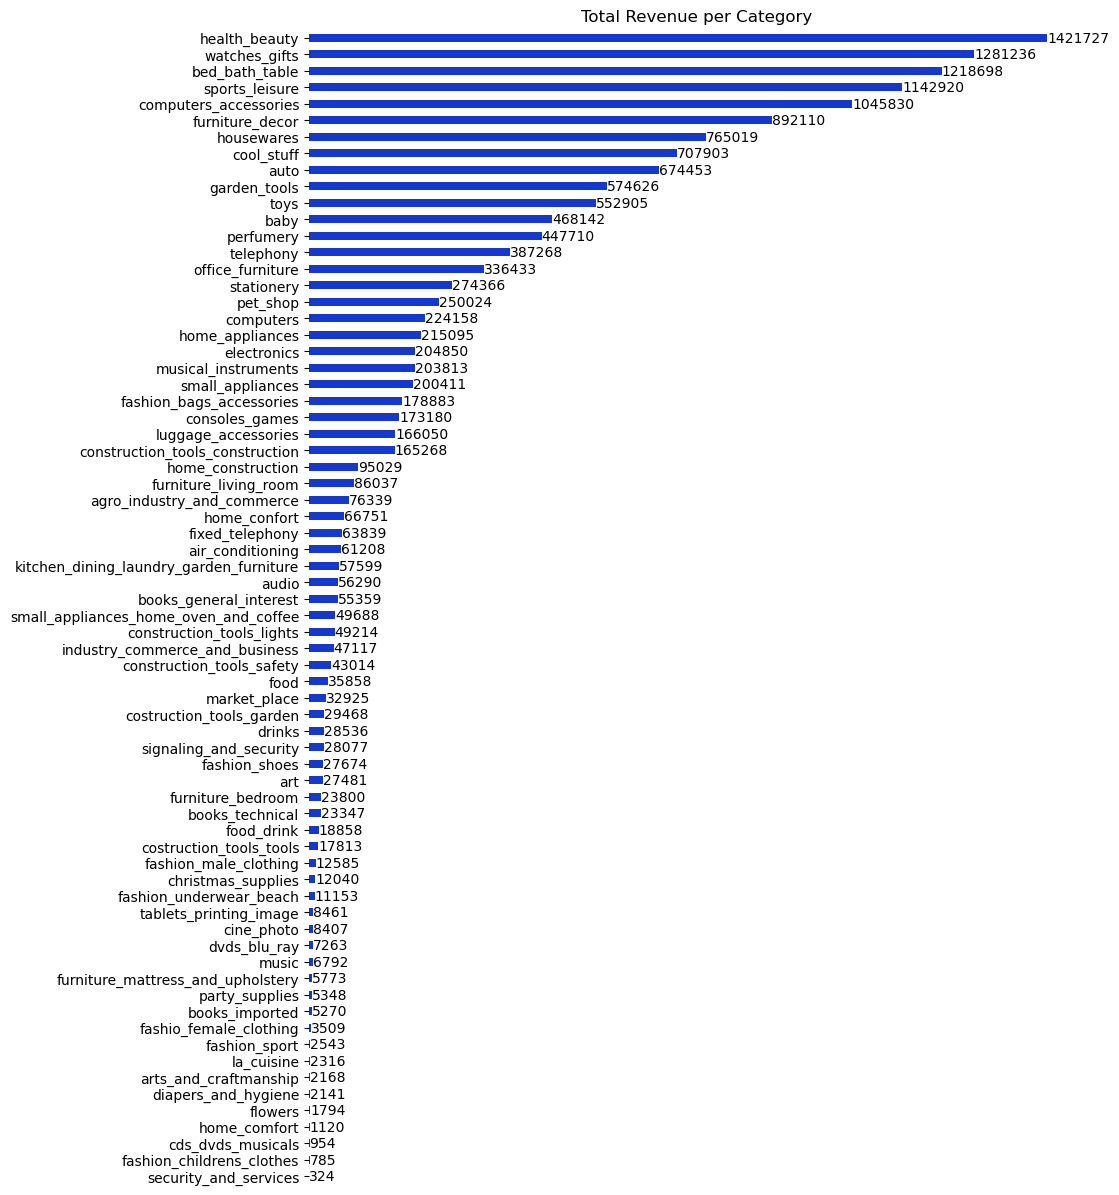

In [154]:
# posortuj wartości wg kolumny Total Revenue w kolejności rosnącej
categories_df_pivot = categories_df_pivot.sort_values("Total Revenue", ascending=True)

# utwórz wykres z sumą zarobków na kategorię
ax = categories_df_pivot.plot(x='Category', y='Total Revenue', kind="barh", color='#1539CC', legend=False, figsize=(10, 15), title="Total Revenue per Category")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, left=False)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(ylabel=None)

O-List nie wymaga od swoich użytkowników zadeklarowania rodzaju produktów, jakie będą oni oferować na swoich profilach. Prowadzi to do sytuacji, w której każdy ze sprzedawców handlujących za pośrednictwem platformy może wystawiać produkty z różnych kategorii. **Sprzedawca z najwyższą liczbą oferowanych kategorii posiada ich nawet 27**.

Na poniższym histogramie zaprezentowany został rozkład liczby sprzedawców przypadających na poszczególne przedziały z liczbą kategorii. **Zdecydowana większość z nich (2 759) oferuje jedną bądź kilka kategorii (do 5 grup produktowych)**. 216 użytkowników sprzedaje od 5 do 10 kategorii. Jedynie 47 osób wystawia na O-List ponad 10 grup produktowych.

In [150]:
# utwórz tabelę przestawną z liczbą kategorii oferowaną przez każdego sprzedawcę
number_of_categories_per_seller = categories_df.pivot_table(index='seller_id', values='EN_product_category_name', aggfunc='nunique')

# resetuj indeks
number_of_categories_per_seller = number_of_categories_per_seller.reset_index()

# zmień nazwy kolumn
number_of_categories_per_seller = number_of_categories_per_seller.rename(columns={'EN_product_category_name': 'Count of Categories'})

# posortuj wartości w kolejności rosnącej
number_of_categories_per_seller = number_of_categories_per_seller.sort_values("Count of Categories", ascending=True)

# oblicz najmniejszą liczbę kategorii przypadającą na jednego użytkownika
min_number_of_categories_per_seller = number_of_categories_per_seller["Count of Categories"].min()

# oblicz największą liczbę kategorii przypadającą na jednego użytkownika
max_number_of_categories_per_seller = number_of_categories_per_seller["Count of Categories"].max()

([], [])

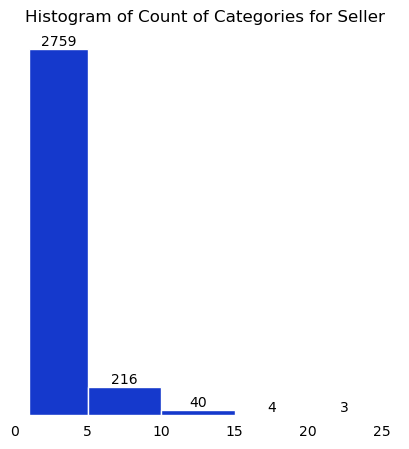

In [151]:
# utwórz histogram z liczbą sprzedawców oferujących różną liczbę kategorii
bins = [1, 5, 10, 15, 20, 25]
ax = number_of_categories_per_seller.plot(x="seller_id", y='Count of Categories', kind='hist', bins=bins, edgecolor='white', color='#1539CC', legend=False, figsize=(5, 5), title="Histogram of Count of Categories for Seller")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True, rotation=360)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.yticks([])

## Wyniki Sprzedażowe w Podziale na Płatności

O-List oferuje swoim użytkownikom cały szereg sposobów płatności za produkty. Platforma dopuszcza płatność za pomocą:
* kart kredytowych
* kart debetowych
* voucherów
* boleto (*metoda płatności regulowana przez Brazilian Federations of Banks*)

In [124]:
# utwórz ramkę danych z wybranymi kolumnami
payments_df = orders.loc[:, ['order_id', 'payment_type', 'payment_installments', 'payment_value', 'item_price', 'shipping_cost']]

# usuń duplikaty z order_id
payments_df = payments_df.drop_duplicates(subset='order_id')

# usuń rzędy z brakami danych
payments_df = payments_df[(payments_df['payment_installments']>0)&(payments_df['payment_value']>0.0)&(payments_df['item_price']>0.0)&(payments_df['shipping_cost']>0.0)&(payments_df['payment_type']!='blank')]

# oblicz odsetek ceny produktu w całkowitej cenie zamówienia
payments_df['% of item_price'] = round((payments_df['item_price'] / (payments_df['item_price'] + payments_df['shipping_cost'])) * 100, 0) 

# oblicz odsetek ceny dostawy w całkowitej cenie zamówienia
payments_df['% of shipping_cost'] = round((payments_df['shipping_cost'] / (payments_df['item_price'] + payments_df['shipping_cost'])) * 100, 0) 

payments_df.head()

,order_id,payment_type,payment_installments,payment_value,item_price,shipping_cost,% of item_price,% of shipping_cost
0,e481f51cbdc54678b7cc49136f2d6af7,credit_card,1,18.12,29.99,8.72,77.0,23.0
3,53cdb2fc8bc7dce0b6741e2150273451,boleto,1,141.46,118.70,22.76,84.0,16.0
4,47770eb9100c2d0c44946d9cf07ec65d,credit_card,3,179.12,159.90,19.22,89.0,11.0
5,949d5b44dbf5de918fe9c16f97b45f8a,credit_card,1,72.20,45.00,27.20,62.0,38.0
6,ad21c59c0840e6cb83a9ceb5573f8159,credit_card,1,28.62,19.90,8.72,70.0,30.0


In [125]:
# utwórsz tabelę przestawną z liczbą zamówień na rodzaj płatności
payment_types_count = payments_df.pivot_table(index='payment_type', values='order_id', aggfunc='count')

# resetuj indeks
payment_types_count = payment_types_count.reset_index()

# posortuj wartości w kolejności malejącej
payment_types_count = payment_types_count.sort_values('order_id', ascending=False)

Metody te płatności różnią się swoją popularnością. **Najwięcej zamówień opłacanych jest za pomocą kart kredytowych (74 614)**. **Boleto** zostało użyte w przypadku **19 554 płatności**. Do **najrzadziej stosowanych metod** należą natomiast **vouchery (2 643) oraz karty debetowe (1 513)**. 

([], [])

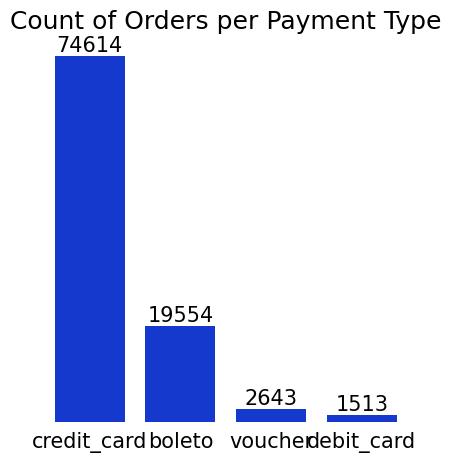

In [126]:
# utwórz wykres kolumnowy z liczbą zamówień na rodzaj płatności
ax = payment_types_count.plot(x='payment_type', y='order_id', kind='bar', color='#1539CC', legend=False, figsize=(5, 5), width=.77, title="Count of Orders per Payment Type")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True, rotation=360)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(xlabel=None)

plt.yticks([])

O-List dopuszcza możliwość opłacenia zakupionych produktów za pomocą rat. Poniższy histogram przedstawia dystrybucję liczby zamówień w podziale na liczbę wpłat, jaką wykonali klienci. 

Znaczna większość zamówień została opłacona w ramach **jednej bądź kilku rat (77 389)**. **15 401** klientów podzieliło całkowitą kwotę na ponad liczbę rat w przedziale od **5 do 10**. **152 zamówień** zostało natomiast podzielone na ponad **15 części**. 

Okazuje się, że liczba rat skorelowana jest z wartością zamówienia. **Im wyższą kwotę zobowiązani są uiścić użytkownicy, tym chętniej podzielą ją oni na kilka płatności**. 

([], [])

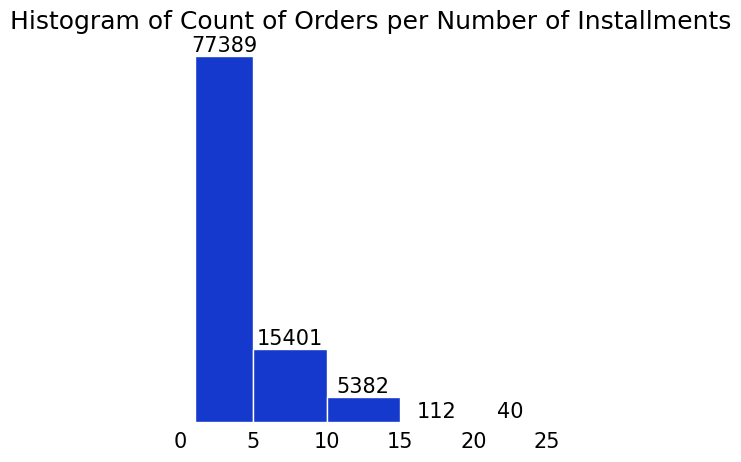

In [127]:
# utwórz histogram z liczbą zamówień na liczbę płatności
bins = [1, 5, 10, 15, 20, 25]
ax = payments_df.plot(x="order_id", y='payment_installments', kind='hist', bins=bins, edgecolor='white', color='#1539CC', legend=False, figsize=(5, 5), title="Histogram of Count of Orders per Number of Installments")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True, rotation=360)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [int(i) if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="edge", color="black")
    
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.yticks([])

In [128]:
# oblicz współczynnik korelacji Pearsona 
correlation_coefficient, p_value = pearsonr(payments_df['payment_installments'], payments_df['payment_value'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.32340827433096764
P-value: 0.0


Całkowita wartość jaką wynoszą zamówienia O-List składają się z dwóch części:
* wartości produktu
* ceny dostawy

Bez względu na rodzaj płatności, dostawa wynosi użytkowników O-List nieco **ponad 20% ceny całkowitej**.

In [129]:
# utwórz tabelę przestawną ze średnią ceną produktu i średnią ceną dostawy na rodzaj płatności
payment_shipping_item_prices_ratio = payments_df.pivot_table(index='payment_type', values=["% of item_price", "% of shipping_cost"], aggfunc='mean')

# resetuj indeks
payment_shipping_item_prices_ratio = payment_shipping_item_prices_ratio.reset_index()

# zaokrąglij wartości 0 miejsc dziesiętnych
payment_shipping_item_prices_ratio["% of item_price"] = round(payment_shipping_item_prices_ratio["% of item_price"], 0)

# zaokrąglij wartości 0 miejsc dziesiętnych
payment_shipping_item_prices_ratio["% of shipping_cost"] = round(payment_shipping_item_prices_ratio["% of shipping_cost"], 0)

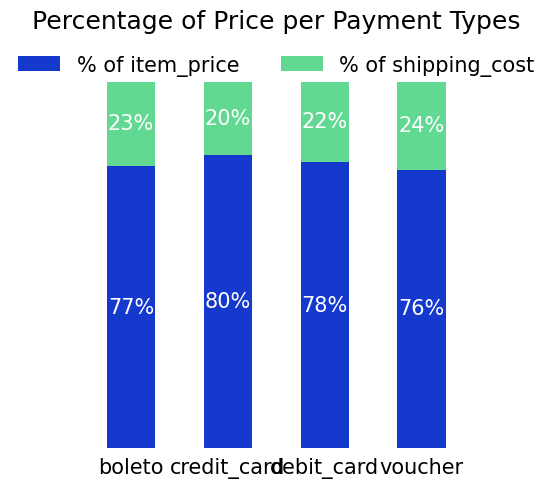

In [130]:
# utwórz wykres kolumnowy-skumulowany dla odsetka cenach w podziale na rodzaje płatności
ax = payment_shipping_item_prices_ratio.plot(x='payment_type', y=["% of item_price", "% of shipping_cost"], kind='bar', stacked=True, color=colors, width=0.5, figsize=(5, 5), title="Percentage of Price per Payment Types")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True, left=False, rotation=360)

for s in ["top", "bottom", "right", "left"]:
    ax.spines[s].set_visible(False)
    
for c in ax.containers:
    labels = [f"{int(i)}%" if i > 0 else "" for i in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="center", color="white")
    
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.07))
    
ax.set_title(label="Percentage of Price per Payment Types", pad=25)

ax.set(xlabel=None)

plt.yticks([])

plt.rcParams['font.size'] = 10

## Oceny Zamówień

Poza danymi na temat czasu realizacji dostaw, kategorii i cen produktów, rodzajów płatności czy wartości zamówień, O-List zbiera także opinie klientów na temat poszczególnych zamówień, które składają się z:
* oceny (w skali 1 do 5)
* tytułu opinii
* treści opinii

Średnia ocena jaką przyjmują wszystkie zamówienia na platformie wynosi 3,9. Do najlepiej ocenianych kategorii (osiągających ocenę równą 5,0) należą:
* ubrania sportowe
* importowane książki  
* kuchnia

Do najgorzej ocenianych kategorii (poniżej oceny równej 3,0) należą natomiast:
* pieluchy i higiena
* małe urządzenia domowe (pieczenie i kawa)
* bezpieczeństwo
* narzędzia i światła do konstrukcji


In [131]:
# utwórz ramkę danych z wybranymi kolumnami z głównej tabeli
reviews_df = orders.loc[:, ['order_id', 'EN_product_category_name', "shipping_cost", "payment_value", 'review_id', 'review_score', 'review_title', 'review_text', 'review_date', 'review_answer_date']]

# usuń duplikaty
reviews_df = reviews_df.drop_duplicates(subset='order_id')

# połącz ramkę danych z tabelą orders_timelines
reviews_df = reviews_df.merge(orders_timelines[["order_id", "Delivery Time", "if_late"]], on='order_id', how="left")

# usuń rzędy z brakami danych
reviews_df = reviews_df.dropna(subset=['Delivery Time', 'if_late'])

# usuń rzędy z brakami danych
reviews_df = reviews_df[reviews_df['review_text']!="blank"]

reviews_df.head()

,order_id,EN_product_category_name,shipping_cost,payment_value,review_id,review_score,review_title,review_text,review_date,review_answer_date,Delivery Time,if_late
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,8.72,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,blank,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8,on time
3,949d5b44dbf5de918fe9c16f97b45f8a,pet_shop,27.20,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,blank,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,14,on time
10,e6ce16cb79ec1d90b1da9085a6118aeb,garden_tools,30.53,259.06,15898b543726a832d4137fbef5d1d00e,1,blank,Aguardando retorno da loja,2017-05-30,2017-05-30 23:13:47,13,on time
20,203096f03d82e0dffbc41ebc2e2bcfb7,health_beauty,8.96,118.86,38cae21b1b57a95959440380d5b2ef7a,2,blank,os correios estäo em greve... näo recebi nenhu...,2017-10-01,2017-10-01 17:55:21,21,late
30,f70a0aff17df5a6cdd9a7196128bd354,baby,34.19,313.19,2f111691fc93df88fc3aa8c2deac61ce,2,blank,O produto veio faltando a base para auto e com...,2017-08-19,2017-08-19 23:46:02,8,on time


In [132]:
# oblicz średnią wartość ocen klientów
average_review_score = round(reviews_df['review_score'].mean(), 2)

# utwórz tabelę przestawną ze średnią oceną klientów na kategorię
average_review_score_per_category = reviews_df.pivot_table(index='EN_product_category_name', values='review_score', aggfunc='mean')

# resetuj indeks
average_review_score_per_category = average_review_score_per_category.reset_index()

# zaokrąglij kolumnę do 2 wartości po przecinku
average_review_score_per_category['review_score'] = round(average_review_score_per_category['review_score'], 2)

# uporządkuj wartości w kolejności malejącej
average_review_score_per_category = average_review_score_per_category.sort_values('review_score', ascending=False)

average_review_score_per_category.head()

,EN_product_category_name,review_score
31,fashion_sport,5.00
9,books_imported,5.00
51,la_cuisine,5.00
22,costruction_tools_tools,4.89
10,books_technical,4.57


Zgodnie z wynikami korelacji Pearsona, ocena jaką otrzymują zamówienia zależą od:
* ceny dostawy
* wartości zamówienia
* czasu dostawy

We wszystkich sprawdzanych przypadkach korelacja Pearsona wskazuje na negatywną zależność, co oznacza, że wraz ze wzrostem ceny dostawy, całkowitej wartości zamówienia czy czasem jego realizacji, spada ocena jaką ono otrzymuje. 

In [133]:
# oblicz współczynnik korelacji Pearsona dla zależności między oceną klientów a kosztem dostawy 
correlation_coefficient, p_value = pearsonr(reviews_df['review_score'], reviews_df['shipping_cost'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.02397171711343551
P-value: 0.0027450905302250747


In [134]:
# oblicz współczynnik korelacji Pearsona dla zależności między oceną klientów a kosztem zamówienia
correlation_coefficient, p_value = pearsonr(reviews_df['review_score'], reviews_df['payment_value'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.03674623621345005
P-value: 4.394056231764042e-06


In [135]:
# oblicz współczynnik korelacji Pearsona dla zależności między oceną klientów a czasem dostawy
correlation_coefficient, p_value = pearsonr(reviews_df['review_score'], reviews_df['Delivery Time'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.24134167706185
P-value: 1.1750556385779158e-205


Dodatkowym czynnikiem warunkującym ocenę jaką otrzymuje zamówienie jest dostarczenie produktów na czas. Wynik testu T studenta wykazuje, iż **zamówienia spóźnione cechują się niższą średnią recenzji niż zamówienia zrealizowane w wyznaczonym terminie**. 

In [136]:
# utwórz ramkę danych z wyłącznie spóźnionymi zamówieniami
late_group = reviews_df[reviews_df['if_late']=="late"]

# pozostaw tylko kolumnę z oceną
late_group = late_group.loc[:, ["review_score"]]

# utwórz ramkę danych z wyłącznie z zamówieniami dostarczonymi na czas
on_time_group = reviews_df[reviews_df['if_late']=="on time"]

# pozostaw tylko kolumnę z oceną
on_time_group = on_time_group.loc[:, ["review_score"]]

# oblicz test-t studenta do średnich ocen spóźnionych i niespóźnionych zamówień
t_statistic, p_value = ttest_ind(late_group, on_time_group)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: [-40.70294314]
P-value: [0.]


Analiza ocen zamówień została uzupełniona o *chmury wyrazów* składające się z tekstów recenzji pozytywnych (rysunek 1.) i negatywnych (rysunek 2.) wystawionych zamówieniom O-List. Z listy słów obu rodzajów recenzji usunięto część wyrazów za pośrednictwem stopwords dla języka portugalskiego. Lista ta powinna zostać dostosowana do tekstów dotyczących zamówień oraz e-commerce, a więc powinna zawierać takie słowa jak: *produkt*, *dostawa* czy *zakup*.

Ze względu na ograniczenia wynikające z pracy z językiem portugalskim, wizualizacje nie są wystarczająco rzetelne, aby móc wyciągnąć wnioski z wystarczającą pewnością. 

Mimo to, do najczęściej występujących słów wśród pozytywnych recenzji należą:
* "prawidłowo"
* "dotarło"
* "zadowolenie"

Natomiast wśród recenzji negatywnych dominują takie słowa jak:
* "zwracać"/"zwrot"
* "zaginione"
* "niepoprawne"

Recenzje zamówień zdają się więc pokrywać z czynnikami wpływającymi na wystawioną ocenę. Klienci wskazują bowiem na sytuacje, w których produkty są zgodne z ofertą i przewidywanym czasem dostawy (w recenzjach pozytywnych) oraz dostaw zagubionych bądź niepoprawnych produktów (w opiniach negatywnych). Dodatkowo, wskazują oni na problem konieczności zwrotu produktu, o czym informacji brakuje w zbiorze danych ilościowych.

In [137]:
# utwórz ramkę danych z pozytywnymi ocenami (powyżej 4)
positive_reviews = reviews_df[reviews_df['review_score']>=4]

# pozostaw tylko kolumnę z recenzjami
positive_reviews = positive_reviews.loc[:, ['review_text']]

# utwórz ramkę danych z negatywnymi ocenami (poniżej 2)
negative_reviews = reviews_df[reviews_df['review_score']<=2]

# pozostaw tylko kolumnę z recenzjami
negative_reviews = negative_reviews.loc[:, ['review_text']]

# utwórz listę stop-words dla języka portugalskiego
stop_words = stopwords.words('portuguese')

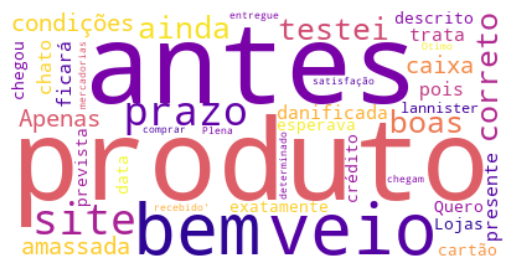

In [138]:
# utwórz chmurę wyrazów dla pozytywnych recenzji
text = positive_reviews.values 

wordcloud = WordCloud(stopwords=stop_words, max_words=100, background_color="white", colormap='plasma').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

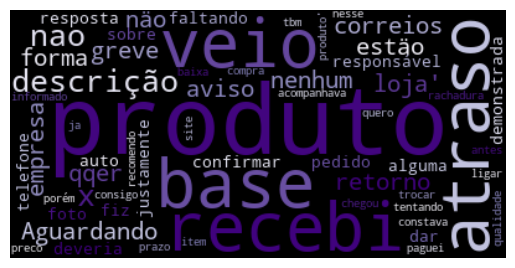

In [139]:
# utwórz chmurę wyrazów dla negatywnych recenzji
text = negative_reviews.values 

wordcloud = WordCloud(stopwords=stop_words, max_words=100, background_color="black", colormap='Purples').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wnioski

Na podstawie powyższych analiz, kadra menedżerska O-List Brazil może wyciągnąć następujące wnioski, które mogą być podstawą pod podejmowane przez nich decyzje: 
1. O-List może mierzyć się z problemem braku wystarczającej liczby „sprzedawców” oferujących swoje produkty innym użytkownikom, generującym ruch oraz przychód na platformie. Firma powinna zadbać więc o uatrakcyjnienie oferty dla potencjalnych sprzedawców, zwłaszcza w stanach z wyższym wskaźnikiem GDP. 
2. O-List powinno zadbać o ustabilizowanie przychodów w pierwszym kwartale, a także zainwestować w promocję podczas świąt i specjalnych okazji (takich jak Black Friday), gdyż nie generują one większego napływu zamówień.
3. O-List powinno skupić swoją uwagę na lepiej rozwiniętych regionach, ze względu na niski potencjał ekonomiczny pozostałych stanów.
4. O-List powinno prowadzić do skrócenia czasu dostaw i zmniejszenia odsetka zamówień spóźnionych – zwłaszcza przy zamówieniach międzystanowych – gdyż zwiększają one liczbę negatywnych komentarzy na temat realizacji usług. 
5. O-List powinien skoncentrować się na dotarciu do użytkowników zainteresowanych ich najbardziej dochodowymi kategoriami, w celu wyspecjalizowania swojej oferty.